# Objective
Study the customer behaviour for granting the loan, if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [151]:
# Importing the libraries and loading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
loan_df = pd.read_csv('loan.csv')
loan_df.shape

(39717, 111)

## Check loan status type

In [152]:
loan_df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627
Current,1140


## Dropping current type as it does not contribute to analysis

In [153]:
current_loan_filter = loan_df['loan_status'] == 'Current'
loan_df = loan_df[~current_loan_filter]
# eliminated 1140 rows
loan_df['loan_status'].value_counts()


,count
loan_status,
Fully Paid,32950
Charged Off,5627


# Handling Missing Values
## First find missing or null values
## Remove columns with null values and again check if any null columns left


In [154]:
loan_df.notnull().sum()
loan_df.dropna(axis = 1, how = 'all', inplace = True)
missing_values = loan_df.isnull().sum()
missing_values[missing_values > 0]

,0
emp_title,2386
emp_length,1033
desc,12529
title,11
mths_since_last_delinq,24905
mths_since_last_record,35837
revol_util,50
last_pymnt_d,71
last_credit_pull_d,2
collections_12_mths_ex_med,56



## Removing Duplicates
find duplicates and remove if duplicates found


In [155]:
loan_df.duplicated().sum()
# Since 0 duplicate rows found so no further action to remove the duplicates
loan_df.shape
# Remaining RC (38577, 56)

(38577, 56)

## Find Unique columns, choose and remove as they might not be used in analysis
## If all the rows are unique, such columns are not great contributor for analysis


In [156]:
filter_unique_columns= [ each_col for each_col in loan_df.columns if loan_df[each_col].nunique() == len(loan_df)]

# Will keep the id columns which could be used for creating pivot table
filter_unique_columns.remove('id')
filter_unique_columns


['member_id', 'url']

In [157]:
# from ['id', 'member_id', 'url'] saving id for refrencing purpose
loan_df.drop(columns=filter_unique_columns, inplace=True)


## Remove Text description columns

In [158]:
loan_df.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Text description columns could be removed

In [159]:
loan_df.drop(columns=['desc', 'title'], inplace=True)

## Analysis limiting till loan grade level - subgrade could be removed

In [160]:
loan_df.drop(columns=[ 'sub_grade'], inplace=True)
#Keep it as used in analysis

In [161]:
# Check Headers and columns
loan_df[loan_df.columns.sort_values()].head()

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,...,tax_liens,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code
0,0,AZ,24000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,27.65,...,0.0,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,860xx
1,0,GA,30000.0,INDIVIDUAL,0.0,1.11,0.0,0,0,1.00,...,0.0,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,309xx
2,0,IL,12252.0,INDIVIDUAL,0.0,0.00,0.0,0,0,8.72,...,0.0,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,606xx
3,0,CA,49200.0,INDIVIDUAL,0.0,0.00,0.0,0,0,20.00,...,0.0,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,917xx
5,0,AZ,36000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,11.20,...,0.0,36 months,12,5632.210000,5632.21,632.21,0.00,5000.00,Source Verified,852xx


## Check for columns which can help in Analysis and what else can be dropped

In [162]:
# Values not changing or not considered for analysis
misc_drop_loan_columns =['application_type','collection_recovery_fee','earliest_cr_line','inq_last_6mths',
                    'last_pymnt_amnt', 'last_pymnt_d', 'last_credit_pull_d', 'out_prncp', 'out_prncp_inv',
                    'pub_rec','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'emp_title' ,'zip_code']
loan_df_drop = loan_df.drop(columns=misc_drop_loan_columns,axis=1)

# Find and drop unique value columns

In [163]:
# check if any column exists with only one unique value
loan_df_drop.nunique().sort_values()

,0
tax_liens,1
delinq_amnt,1
chargeoff_within_12_mths,1
acc_now_delinq,1
policy_code,1
collections_12_mths_ex_med,1
initial_list_status,1
pymnt_plan,1
term,2
loan_status,2


In [164]:
filter_one_unique_val = [ each_col for each_col in loan_df_drop.columns if loan_df_drop[each_col].nunique() == 1]

loan_df_drop = loan_df_drop.drop(columns=filter_one_unique_val,axis=1)


In [165]:
loan_df_drop.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [166]:
# Dropping columns with too many missing values
threshold = 0.5 * len(loan_df_drop)  # 50% threshold
loan_df_drop = loan_df_drop.dropna(axis=1, thresh=threshold)


In [167]:
loan_df_drop.dtypes

,0
id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
emp_length,object
home_ownership,object


#Start conversions to correct data types

In [168]:
#TODO: reset columns - delete later
loan_df_drop['term'] = loan_df['term']
loan_df_drop['term'].str.split(' ')
loan_df_drop['revol_util'] = loan_df['revol_util']
loan_df_drop['emp_length'] = loan_df['emp_length']
loan_df_drop['int_rate'] = loan_df['int_rate']


In [169]:
loan_df_drop['term'] = loan_df_drop['term'].str.extract('(\d+)')[0].astype(int)
loan_df_drop['int_rate'] = loan_df_drop['int_rate'].str.strip('%').astype(float)
loan_df_drop['revol_util'] = loan_df_drop['revol_util'].str.strip('%').astype(float)
loan_df_drop = loan_df_drop.astype({'loan_amnt':'float', 'funded_amnt':'float'})
loan_df_drop['emp_length'] = pd.to_numeric(loan_df_drop['emp_length']
                                           .astype(str) # Convert the column to string type before applying the lambda function
                                           .apply(lambda x: 0 if "<" in x
                                                  else (x.split('+')[0] if "+" in x
                                                        else x.split()[0])),
                                           errors='coerce')

loan_df_drop['emp_length'].value_counts()


,count
emp_length,
10.0,8488
0.0,4508
2.0,4291
3.0,4012
4.0,3342
5.0,3194
1.0,3169
6.0,2168
7.0,1711


In [170]:
# Decimal rounding for float columns
decimal_restriction_col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate']
loan_df_drop[decimal_restriction_col] = loan_df_drop[decimal_restriction_col].round(2)
loan_df_drop[decimal_restriction_col]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate
0,5000.0,5000.0,4975.0,10.65
1,2500.0,2500.0,2500.0,15.27
2,2400.0,2400.0,2400.0,15.96
3,10000.0,10000.0,10000.0,13.49
5,5000.0,5000.0,5000.0,7.90
...,...,...,...,...
39712,2500.0,2500.0,1075.0,8.07
39713,8500.0,8500.0,875.0,10.28
39714,5000.0,5000.0,1325.0,8.07
39715,5000.0,5000.0,650.0,7.43


In [171]:
#Convert date to proper date format
loan_df_drop['issue_d'] = pd.to_datetime(loan_df_drop['issue_d'], format = '%b-%y')
loan_df_drop['issue_d']

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


Check for

In [172]:
(loan_df_drop.isnull().sum()*100)/len(loan_df_drop)
loan_df_drop['revol_util'].isnull().value_counts()

,count
revol_util,
False,38527
True,50


In [173]:
loan_df_drop = loan_df_drop[loan_df_drop['emp_length'].notna()]
loan_df_drop = loan_df_drop[loan_df_drop['pub_rec_bankruptcies'].notna()]
loan_df_drop.shape

(36847, 23)

## Derived columns

In [174]:
# Creating a dervied columns for issue month and issue year from issue date
loan_df_drop['issue_year']=pd.DatetimeIndex(loan_df_drop['issue_d']).year
loan_df_drop['issue_month']=pd.DatetimeIndex(loan_df_drop['issue_d']).month

# Univariate analysis

## Get a quick view of all graphs for all column types and check if bucketing and outlier modification required for columns
## Get category and Numeric columns separately



In [175]:
# Extracting Numerical and categorical column for Analysis
num_cols = []
cat_cols = []
for i in loan_df_drop.columns:
  if(loan_df_drop[i].dtypes == 'int64' or loan_df_drop[i].dtypes == 'float64'):
    num_cols.append(i)

  elif(loan_df_drop[i].dtypes == 'object'):
    cat_cols.append(i)


### Tried plotting the graphs in one go and derive conclusions, lot of graphs may confuse without individual buckets.
### Have to individually deal with each column, outliers and derive at conclusions

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


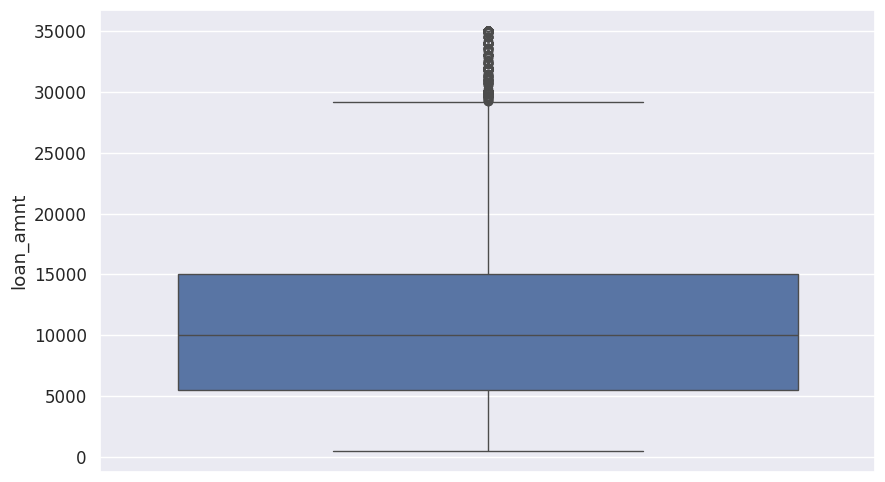

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


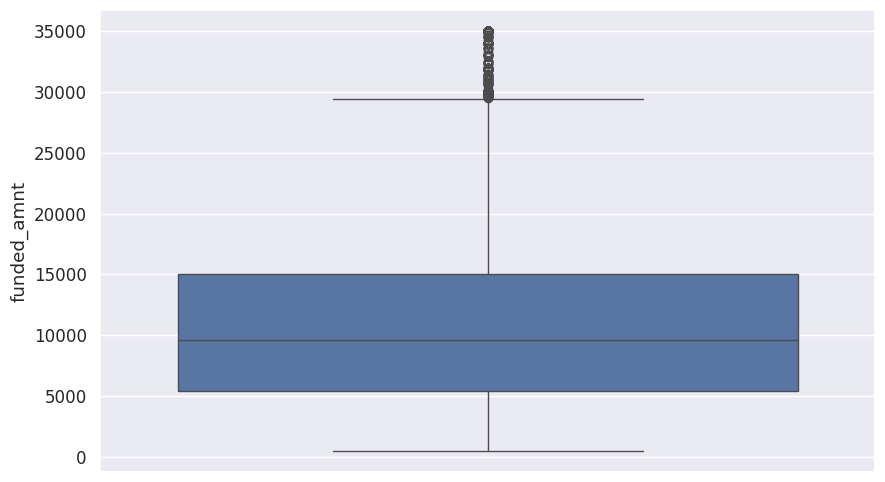

count    36847.000000
mean     10430.400868
std       7008.919434
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


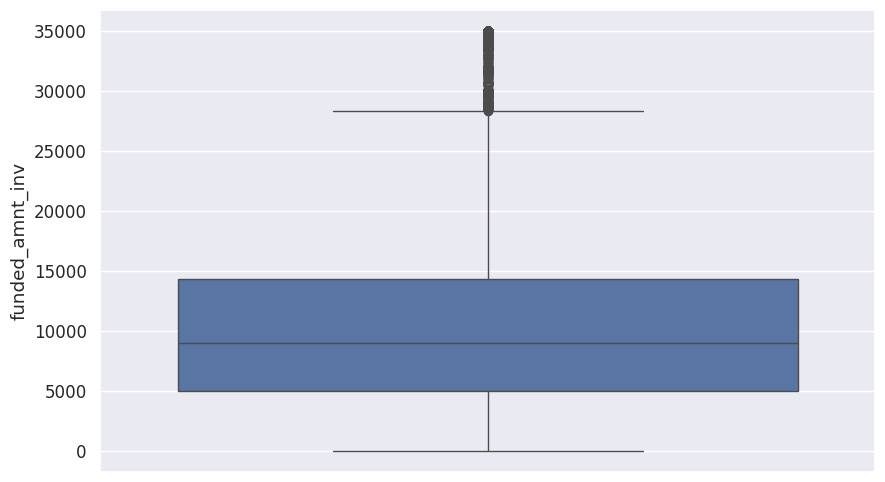

count    36847.000000
mean        42.029473
std         10.409407
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64


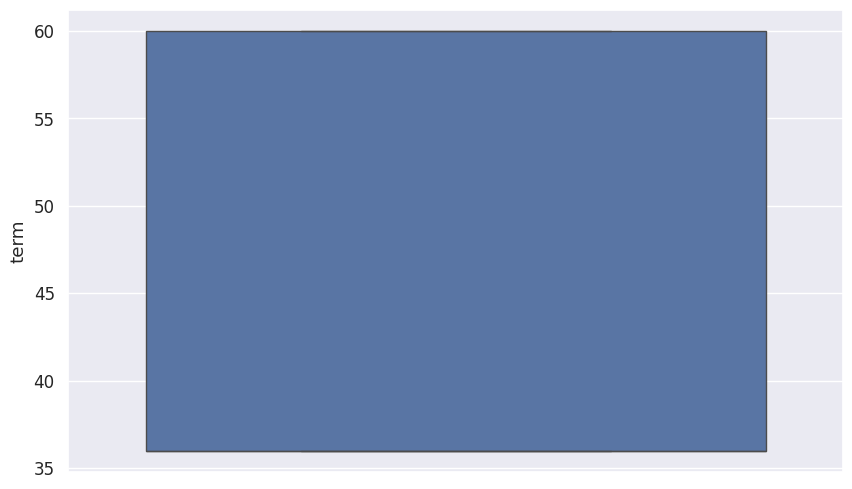

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64


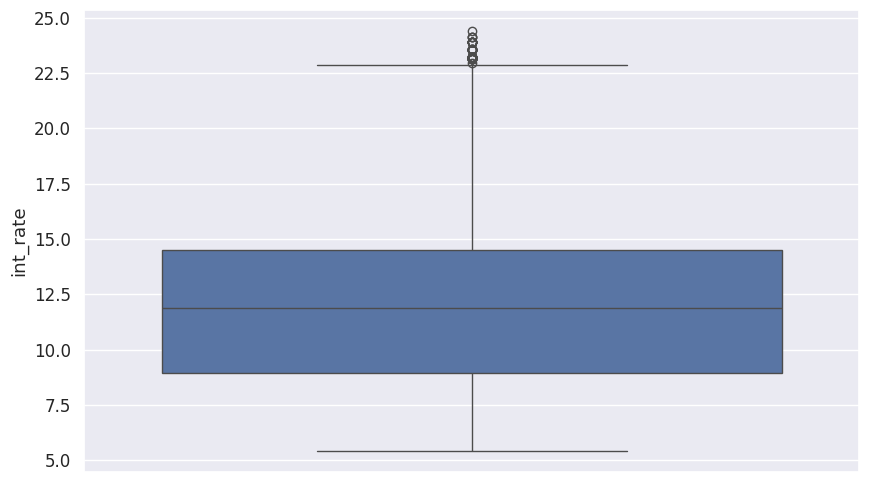

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64


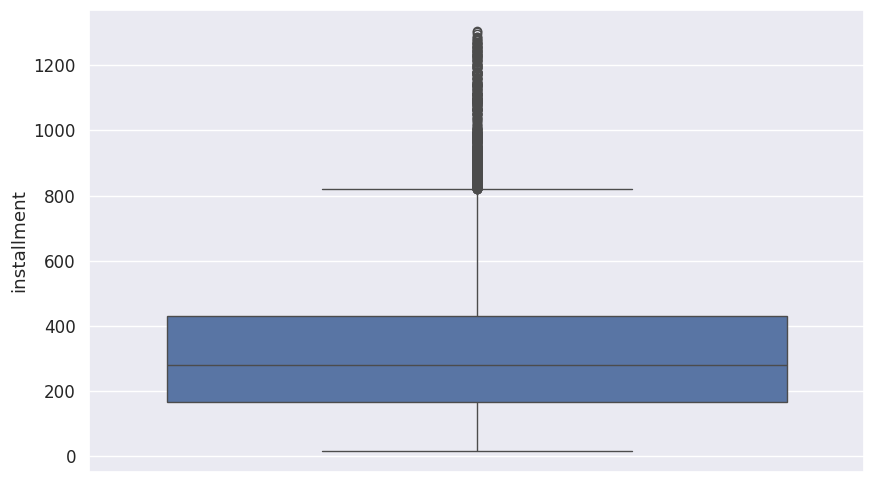

count    36847.000000
mean         4.961788
std          3.551783
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


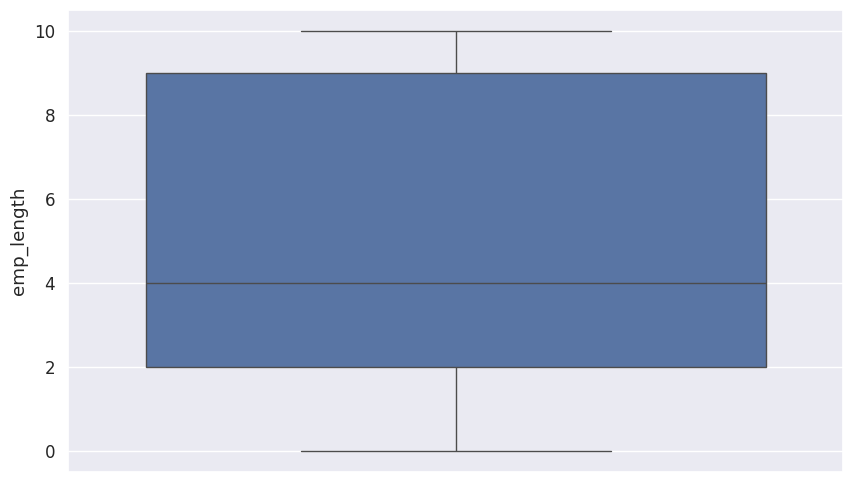

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


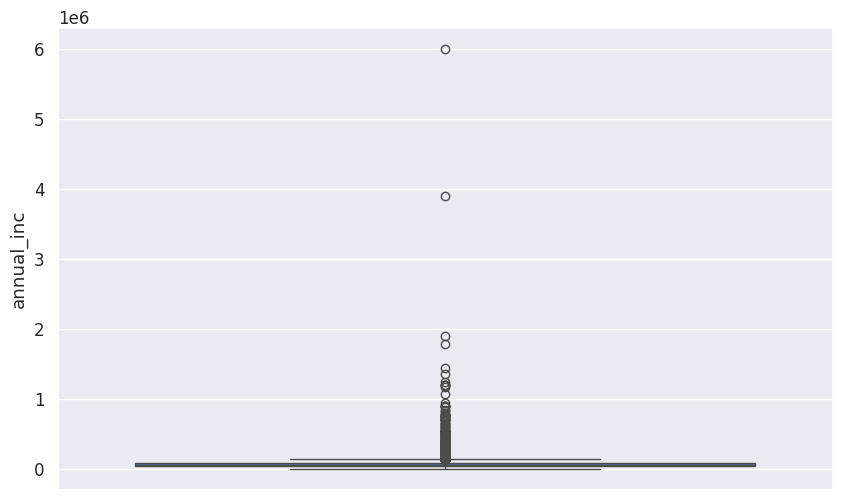

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


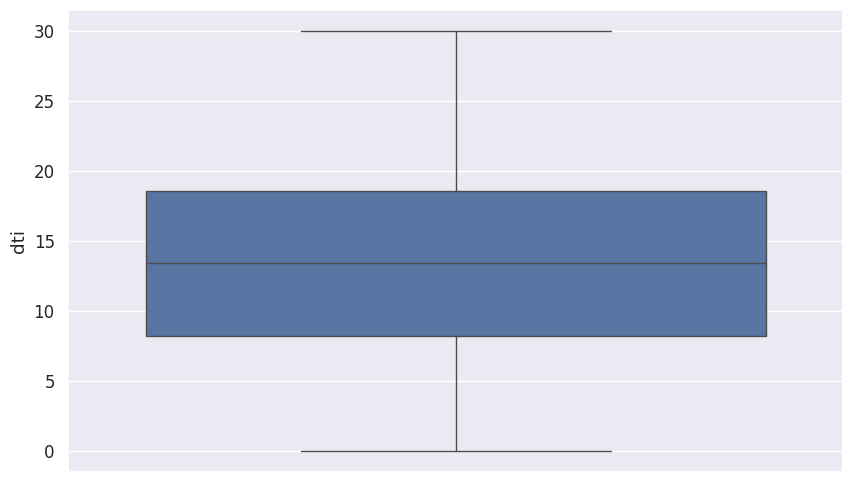

count    36847.000000
mean         0.146172
std          0.492100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


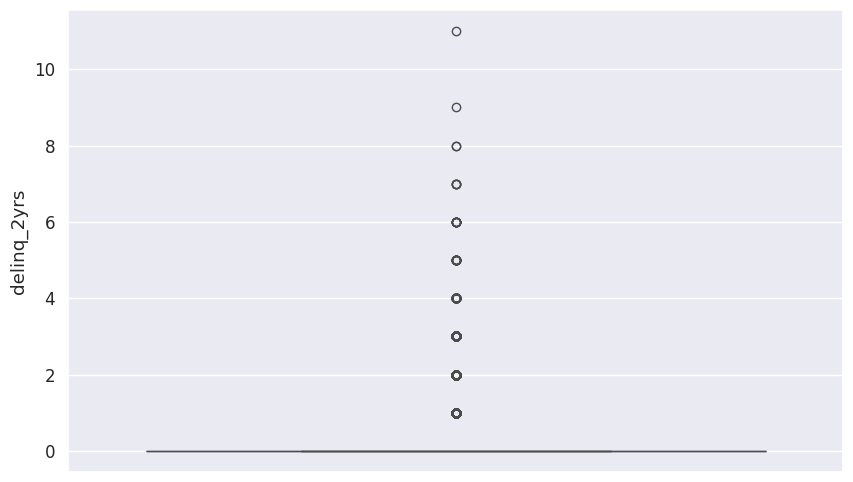

count    36847.000000
mean         9.296578
std          4.377256
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


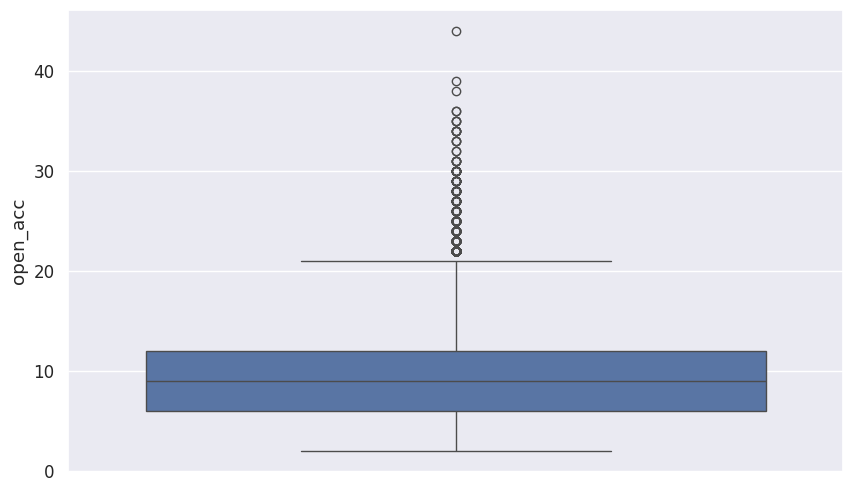

count     36847.000000
mean      13358.049095
std       15846.594215
min           0.000000
25%        3712.000000
50%        8858.000000
75%       17009.500000
max      149588.000000
Name: revol_bal, dtype: float64


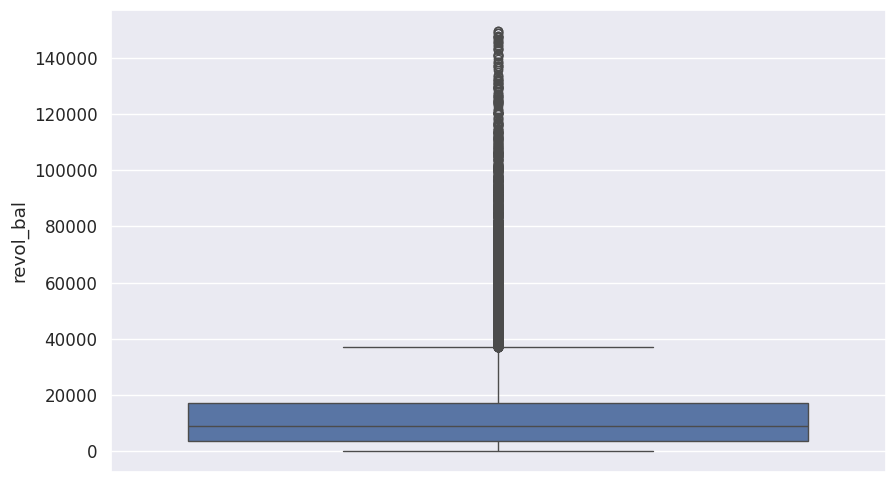

count    36800.000000
mean        48.992830
std         28.313209
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64


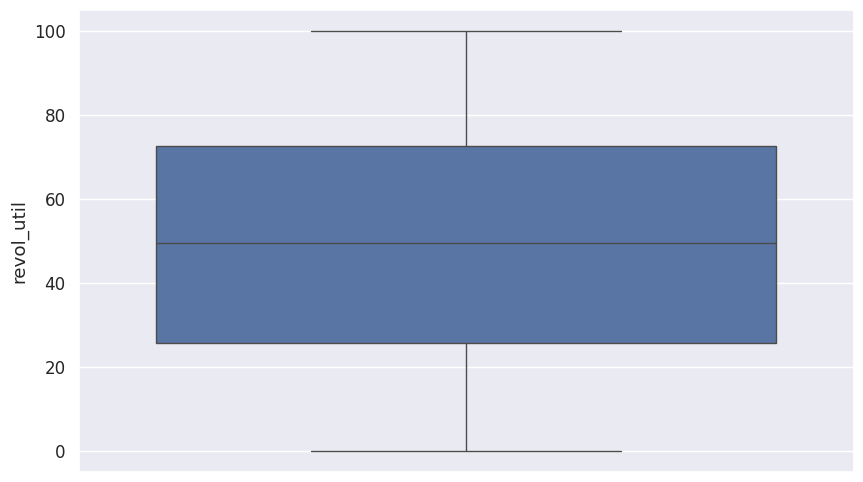

count    36847.000000
mean        22.137623
std         11.410978
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


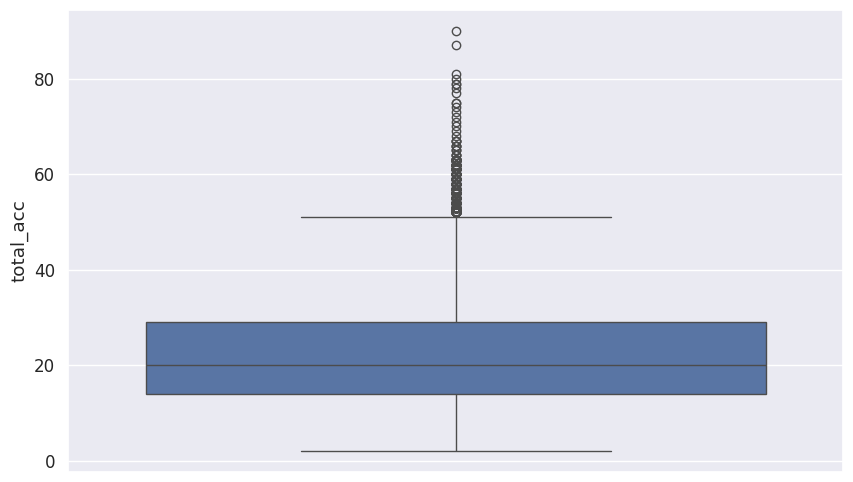

count    36847.000000
mean         0.041794
std          0.200799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


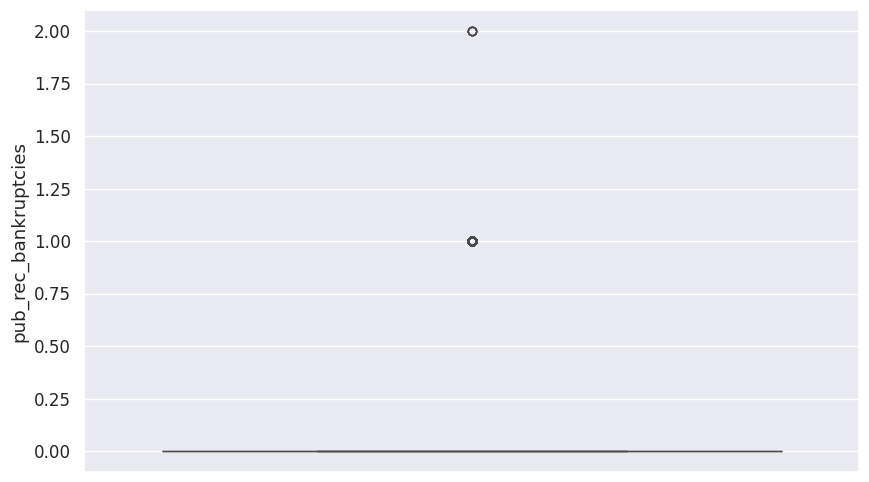

In [176]:
for i in num_cols:
  if(i != 'id'):
    print(loan_df_drop[i].describe())
    plt.figure(figsize=(10, 6))
    sns.boxplot(loan_df_drop[i])
    plt.show()


## Creating buckets and dealing with outliers

In [177]:
num_cols

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

In [178]:
for i in num_cols:
    if(i != 'id'):
      print(loan_df_drop[i].describe())

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
count    36847.000000
mean     10430.400868
std       7008.919434
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
count    36847.000000
mean        42.029473
std         10.409407
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64
count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max        

##Creating buckets

In [179]:
# Loan Amount Bucket
def bucket_loan_amnt(column):
    if column <= 5500:
        return '0 - 5500'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5500 - 10000'
    elif (column >10000) and (column <= 15000):
        return '10000 - 15000'
    else:
        return '15K - above' # 75% quartile

loan_df_drop['loan_amnt_b'] = loan_df_drop.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

# #Annual Income Bucket
# min      4.000000e+03
# 25%      4.100400e+04
# 50%      6.000000e+04
# 75%      8.300000e+04
# max      6.000000e+06
def bucket_annual_inc(column):
    if column <= 41004: # 25% quartile
        return '0 - 41K'
    elif (column >41004) and (column <= 50000):
        return '41k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df_drop['annual_inc_b'] = loan_df_drop.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

# Interest rate bucket
# count    36847.000000
# mean        11.988346
# std          3.702091
# min          5.420000
# 25%          8.940000
# 50%         11.860000
# 75%         14.520000
# max         24.400000
# Name: int_rate, dtype: float64
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df_drop['int_rate_b'] = loan_df_drop.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)


# dti Bucket
# A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations,
# excluding mortgage and the requested LC loan,
# divided by the borrower’s self-reported monthly income.
# count    36847.000000
# mean        13.330449
# std          6.651565
# min          0.000000
# 25%          8.210000
# 50%         13.420000
# 75%         18.590000
# max         29.990000
# Name: dti, dtype: float64
def bucket_dti(column):
    if column <=  8.21:
        return 'Very Low' # 25% quartile
    elif (column > 8.21) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):  # 75% quartile
        return 'High'
    else:
        return 'Very High'

loan_df_drop['dti_b'] = loan_df_drop.apply(lambda x : bucket_dti(x.dti), axis = 1)

##Identify the outlier list and remove outliers then check if all outliers removed

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


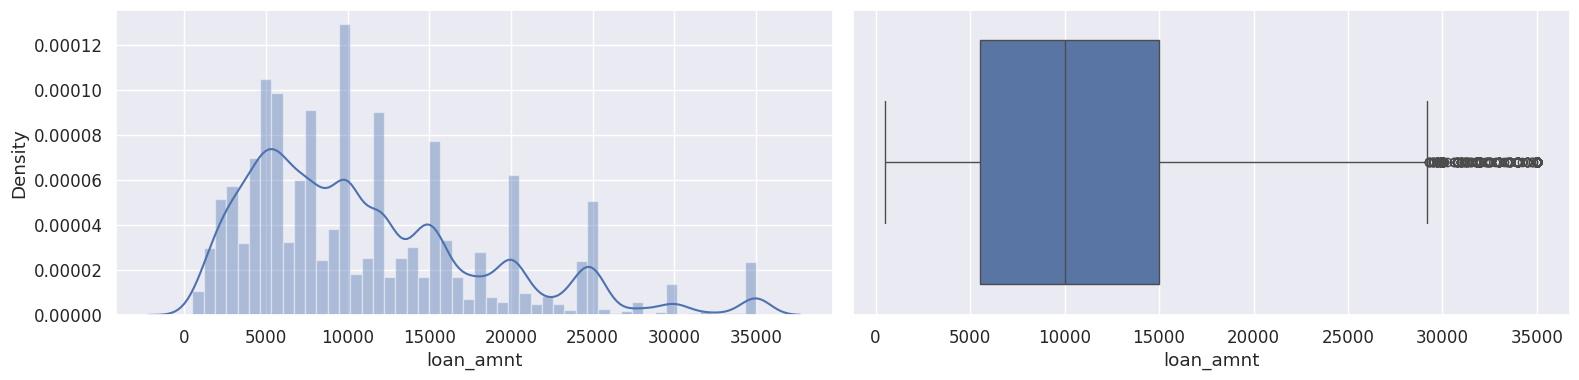

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


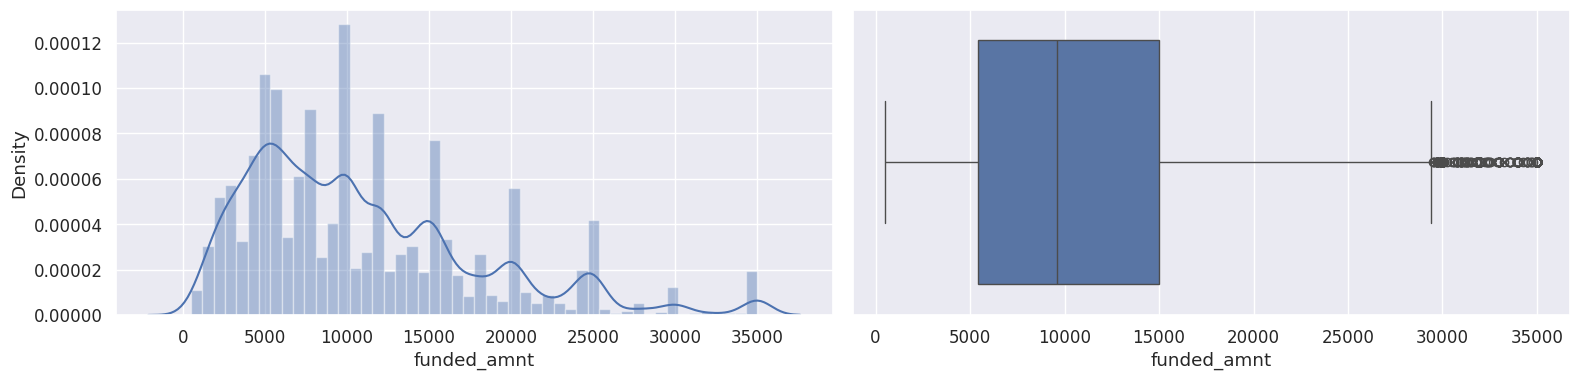

count    36847.000000
mean     10430.400868
std       7008.919434
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


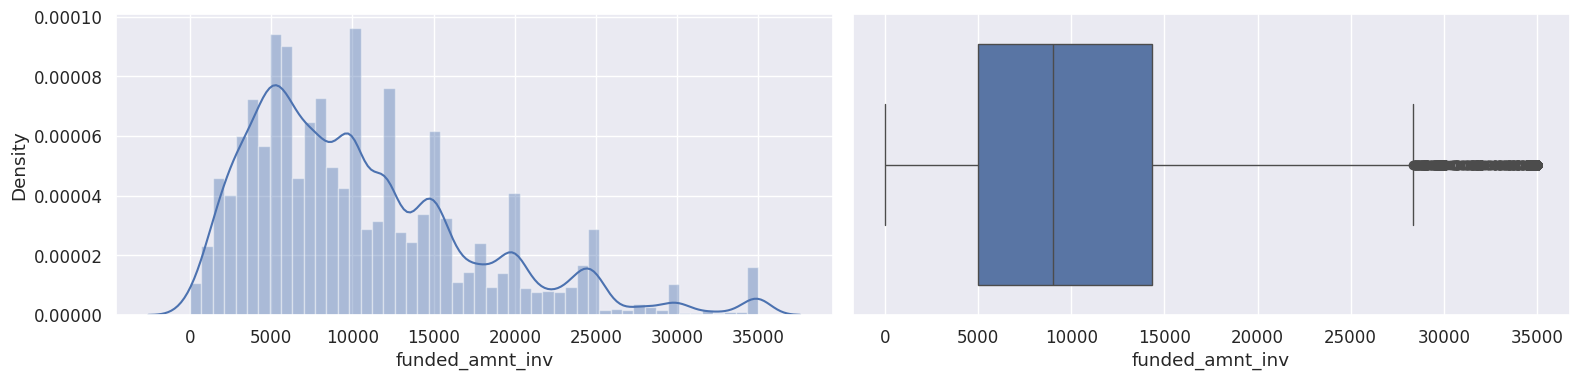

count    36847.000000
mean        42.029473
std         10.409407
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64


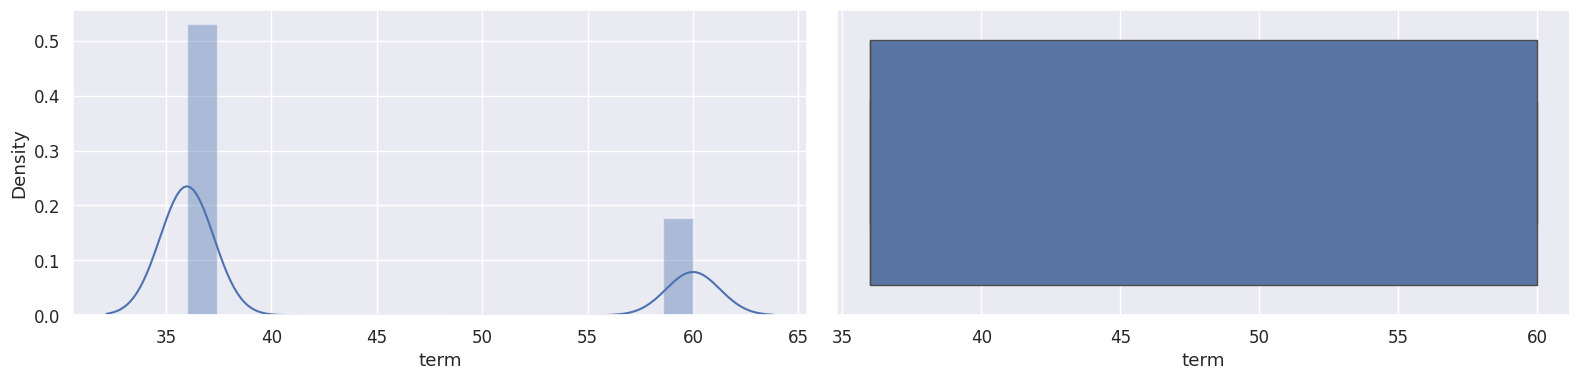

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64


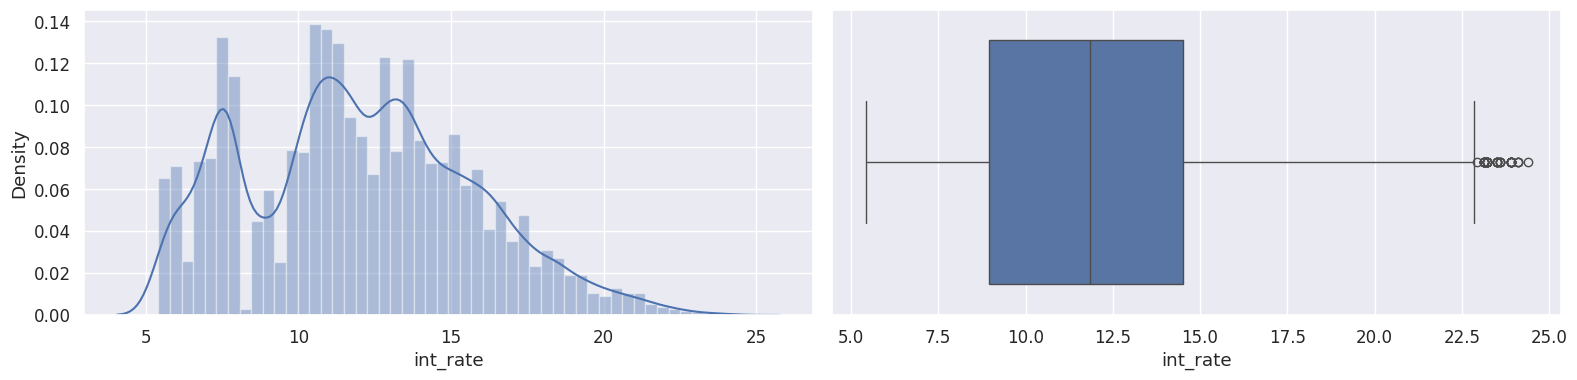

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64


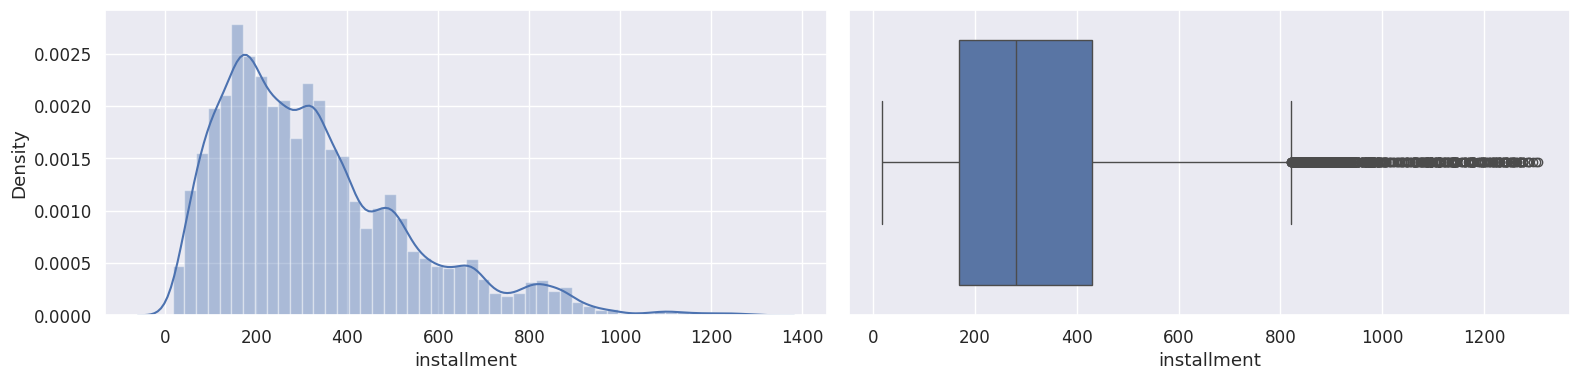

count    36847.000000
mean         4.961788
std          3.551783
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


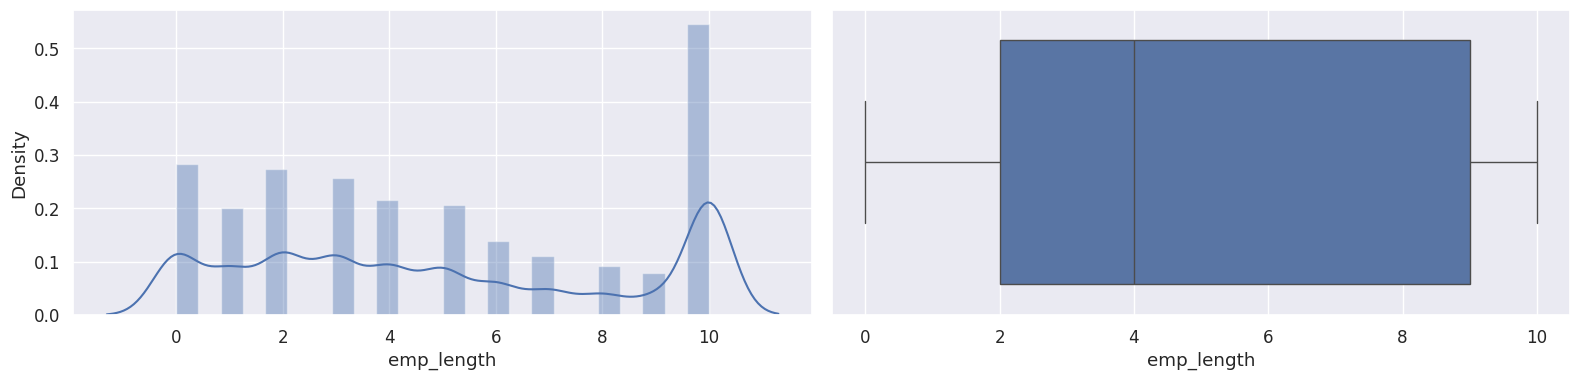

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


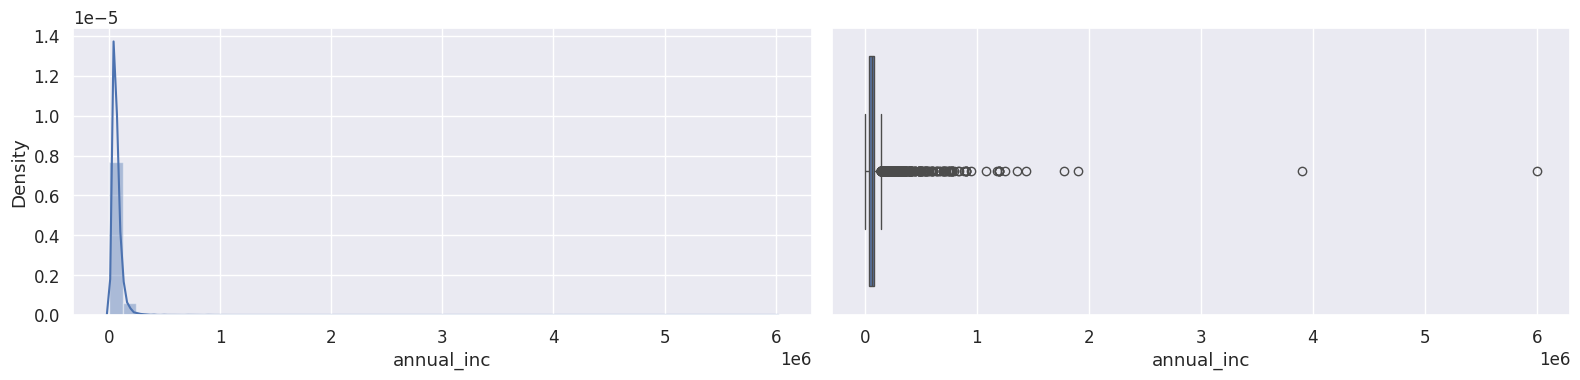

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


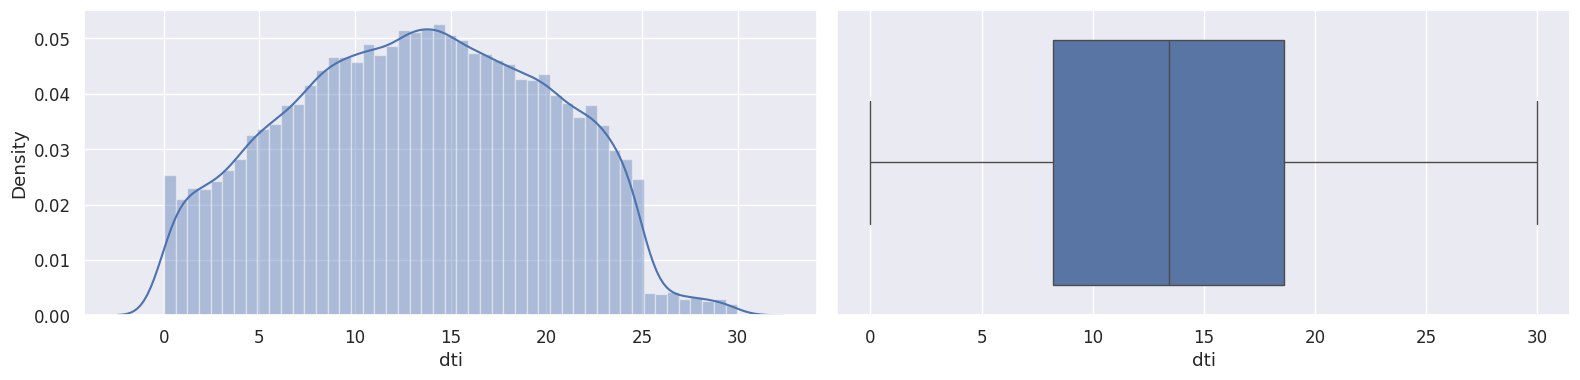

count    36847.000000
mean         0.146172
std          0.492100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


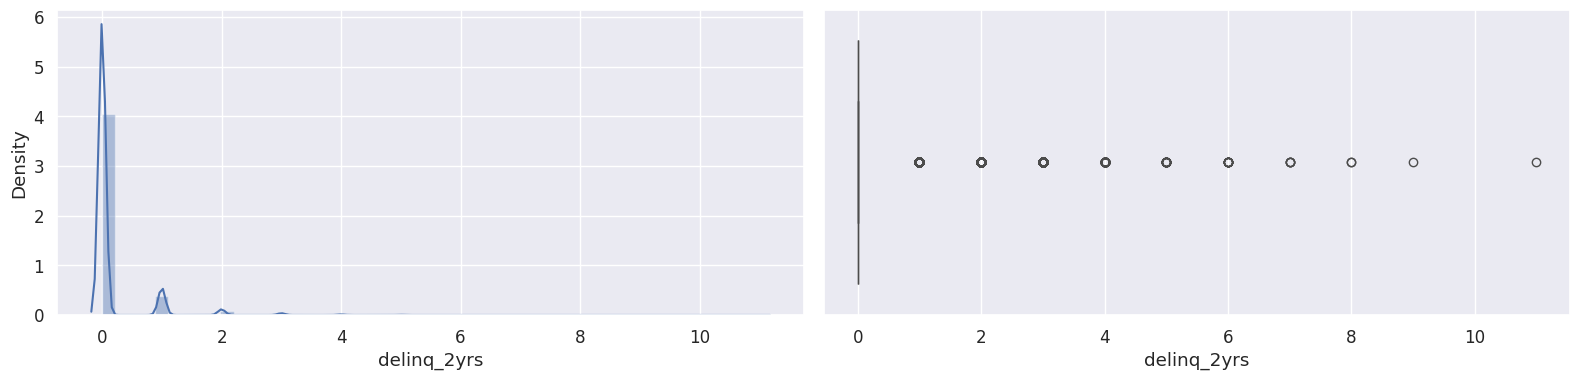

count    36847.000000
mean         9.296578
std          4.377256
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


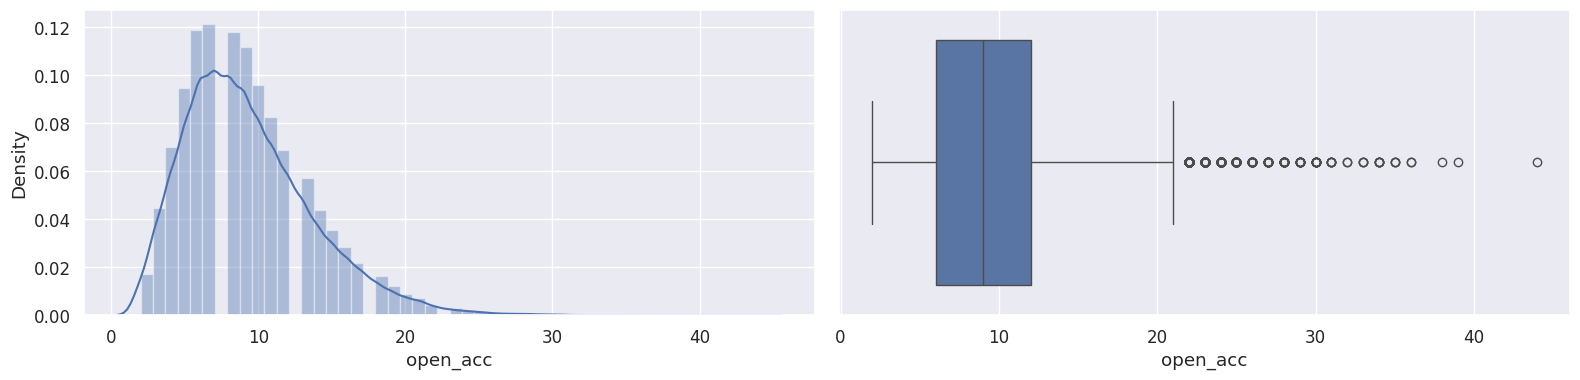

count     36847.000000
mean      13358.049095
std       15846.594215
min           0.000000
25%        3712.000000
50%        8858.000000
75%       17009.500000
max      149588.000000
Name: revol_bal, dtype: float64


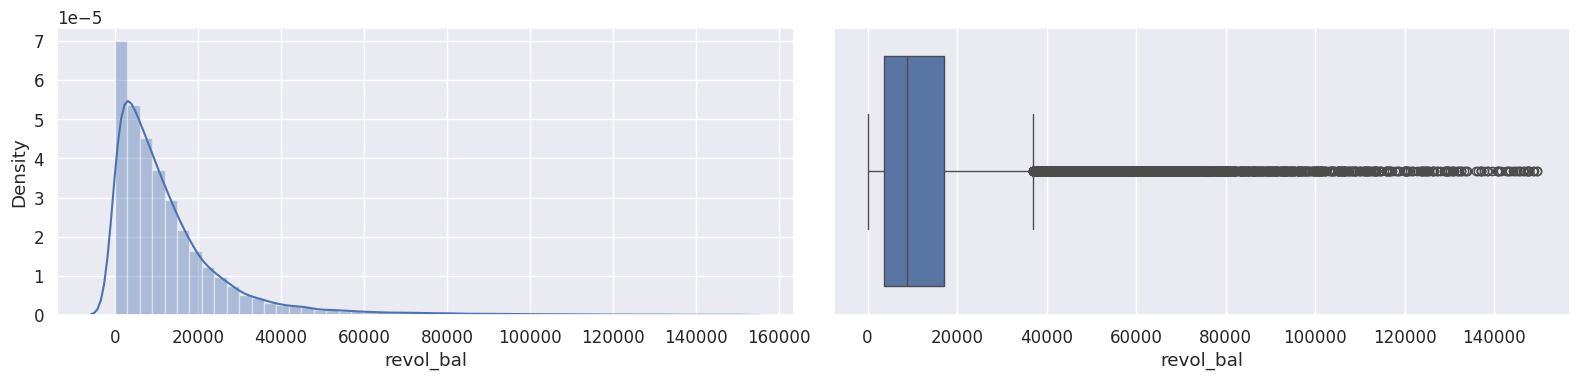

count    36800.000000
mean        48.992830
std         28.313209
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64


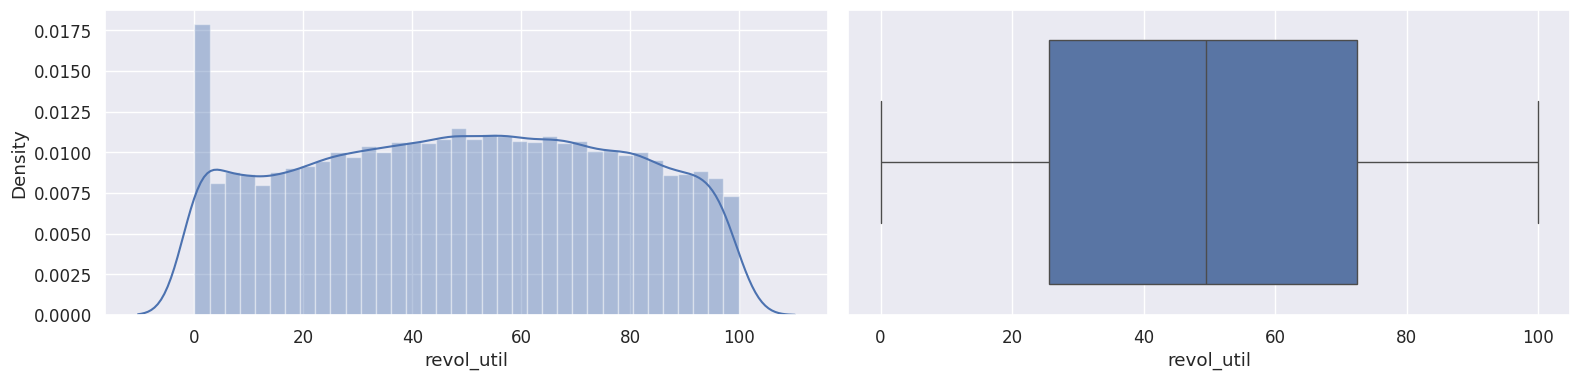

count    36847.000000
mean        22.137623
std         11.410978
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


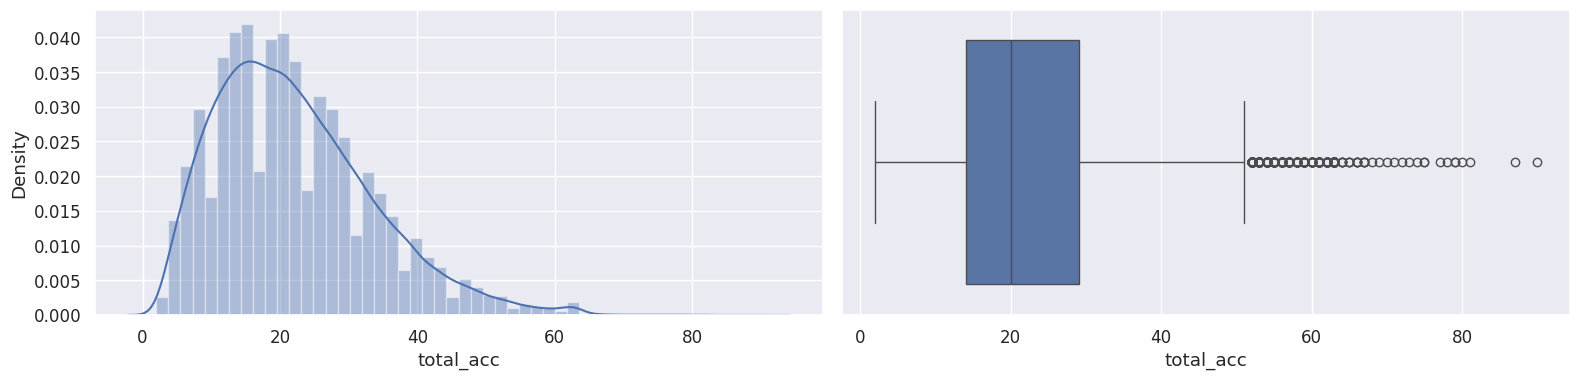

count    36847.000000
mean         0.041794
std          0.200799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


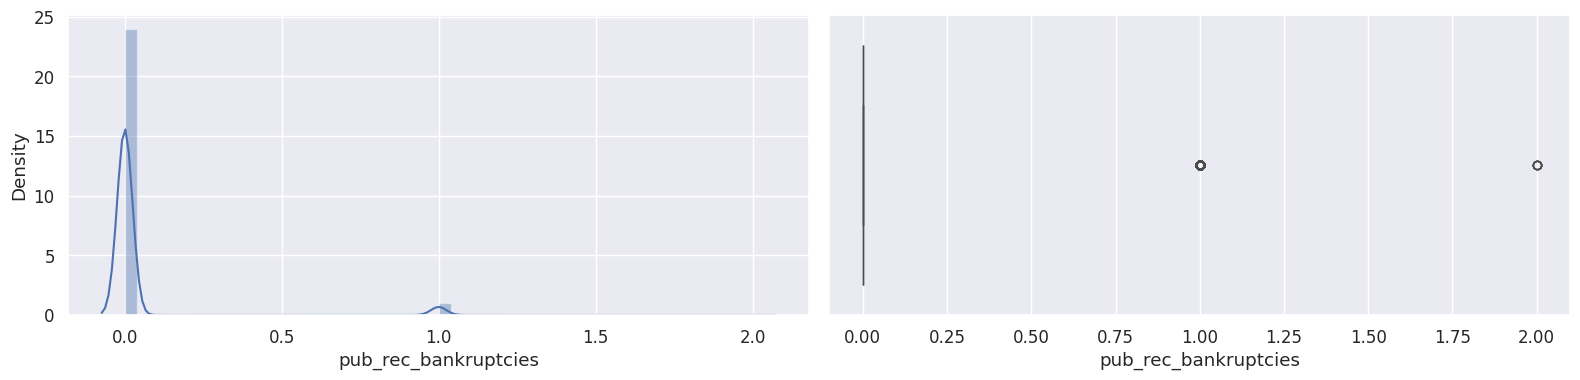

In [180]:
outliers_list = ['annual_inc', 'delinq_2yrs','funded_amnt_inv','funded_amnt','int_rate','installment','loan_amnt','open_acc','total_acc','pub_rec_bankruptcies']

# Check placed
if(loan_df_drop['int_rate'].dtypes !='float64'):
  loan_df_drop['int_rate'] = loan_df_drop['int_rate'].str.strip('%').astype(float)

# Define a function to remove outliers based on IQR
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Outliers can be removed this way but considering Actuals for analysis.
# loan_df_drop = remove_outliers(loan_df_drop, outliers_list)

for i in num_cols:
  if(i != 'id'):
    print(loan_df_drop[i].describe())
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(loan_df_drop[i], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=i, data=loan_df_drop, ax=p[1])
    p[0].set_xlabel(i)
    p[1].set_xlabel(i)
    plt.tight_layout()
    plt.show()

#Observations from above graphs

## Observation:1 => Loan Amount
## Most of the loan amount applied was in the range of 5.5k-15k.
## Max Loan amount applied was ~35k.

## Observation:2 => funded_amnt
## Most of the funded_amnt was in the range of 5.4k-15k.
## Max funded_amnt applied was ~35k.


## Observation:3 => funded_amnt_inv
## Most of the funded_amnt_inv applied was in the range of 5k-14.3k.
## Max funded_amnt_inv was ~35k.

## Observation:4 => term
## Min term is 36
## Max term is 60

## Observation:5 => int_rate
## For most of the Applicants Int rate range of 8.9 - 14.52.
## Max int rate is 24.4.
## Min Rate is 5.4
## Average rate of int is 11.8

count     36847
unique        7
top           B
freq      11150
Name: grade, dtype: object
grade
B    11150
A     9518
C     7486
D     4868
E     2585
F      944
G      296
Name: count, dtype: int64


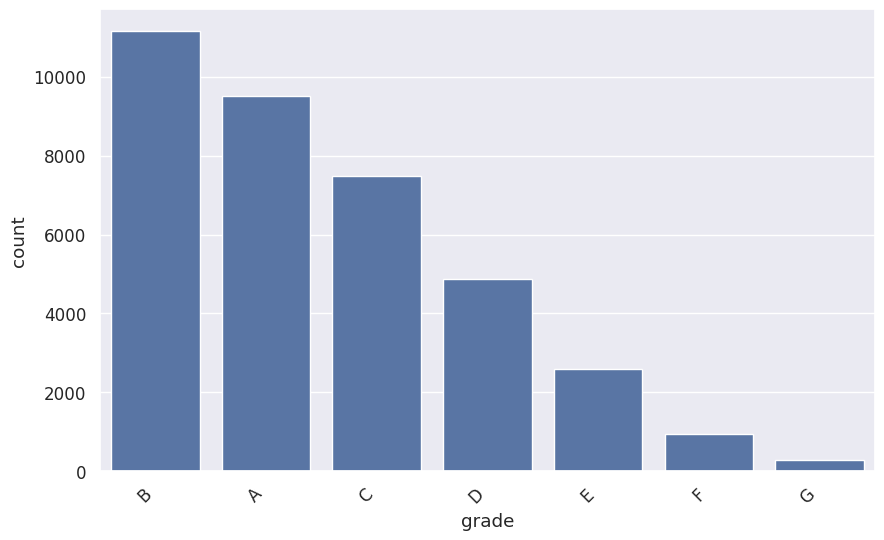

count     36847
unique        4
top        RENT
freq      17698
Name: home_ownership, dtype: object
home_ownership
RENT        17698
MORTGAGE    16343
OWN          2708
OTHER          98
Name: count, dtype: int64


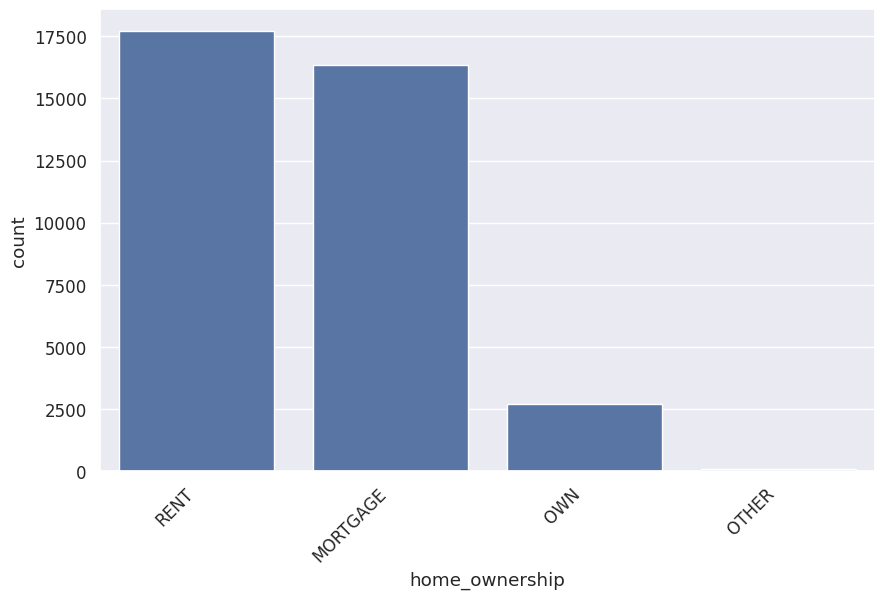

count            36847
unique               3
top       Not Verified
freq             15582
Name: verification_status, dtype: object
verification_status
Not Verified       15582
Verified           11771
Source Verified     9494
Name: count, dtype: int64


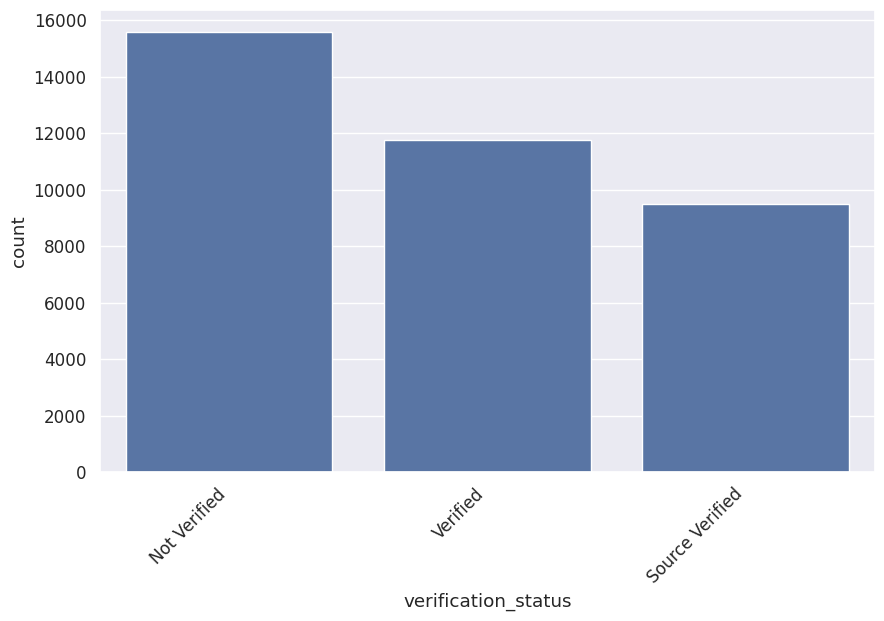

count          36847
unique             2
top       Fully Paid
freq           31566
Name: loan_status, dtype: object
loan_status
Fully Paid     31566
Charged Off     5281
Name: count, dtype: int64


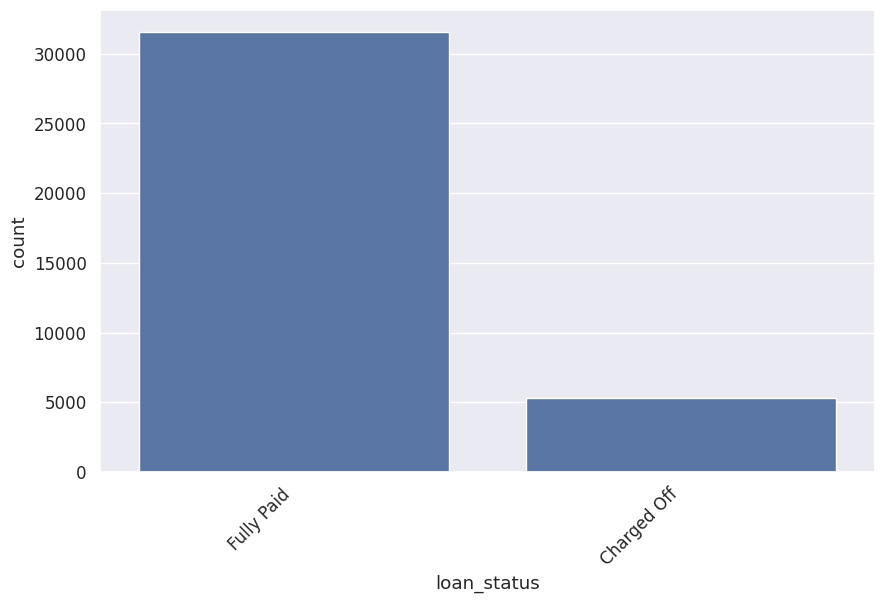

count                  36847
unique                    14
top       debt_consolidation
freq                   17384
Name: purpose, dtype: object
purpose
debt_consolidation    17384
credit_card            4801
other                  3608
home_improvement       2737
major_purchase         2061
small_business         1657
car                    1431
wedding                 894
medical                 647
moving                  543
house                   349
vacation                342
educational             299
renewable_energy         94
Name: count, dtype: int64


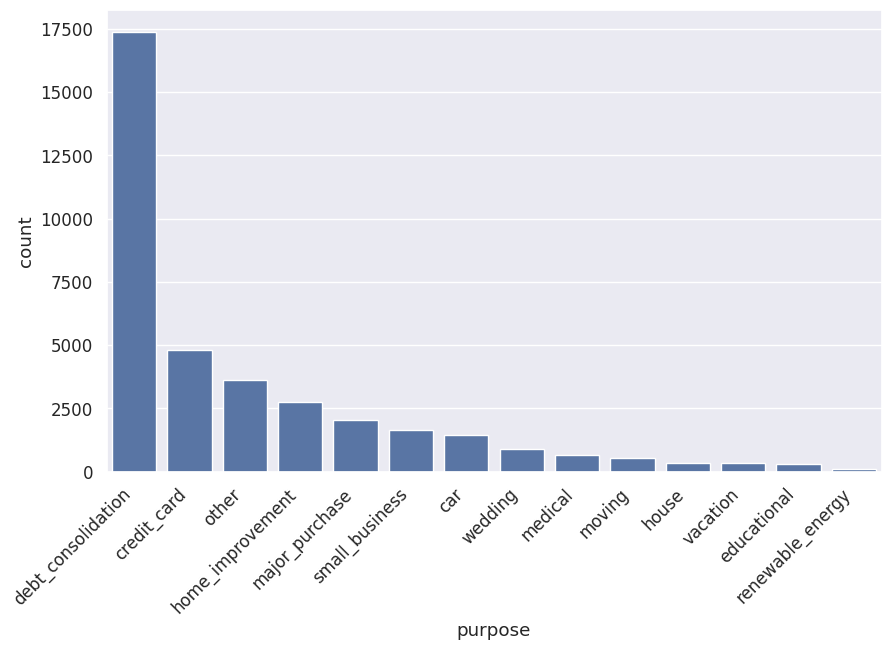

count     36847
unique       49
top          CA
freq       6685
Name: addr_state, dtype: object
addr_state
CA    6685
NY    3512
FL    2642
TX    2559
NJ    1735
IL    1430
PA    1428
VA    1307
GA    1294
MA    1230
OH    1129
MD     980
AZ     794
WA     760
CO     721
CT     697
NC     695
MI     662
MO     639
MN     576
NV     461
SC     443
OR     415
AL     411
WI     409
LA     408
KY     305
OK     281
KS     242
UT     241
AR     224
DC     208
RI     190
NM     173
WV     164
HI     161
NH     154
DE     108
MT      77
AK      75
WY      75
SD      60
VT      51
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: count, dtype: int64


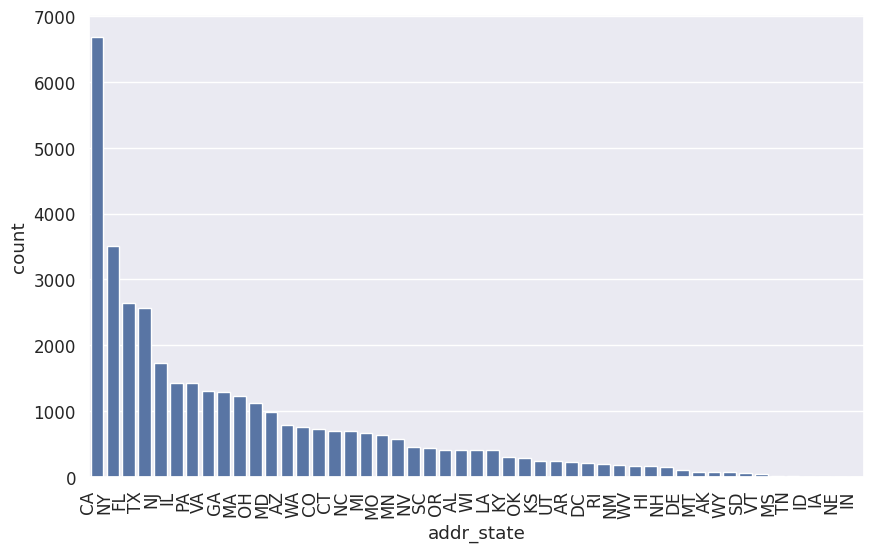

In [181]:
# Category column analysis

for i in cat_cols:
  print(loan_df_drop[i].describe())
  print(loan_df_drop[i].value_counts())
  plt.figure(figsize=(10, 6))
  sns.barplot(x=loan_df_drop[i].value_counts().index, y=loan_df_drop[i].value_counts())
  if(i == 'addr_state'):
    plt.xticks(rotation=90, ha='right')
  else:
    plt.xticks(rotation=45, ha='right')
  plt.show()


In [182]:
# Pivot creation for id
pivot_table = pd.pivot_table(data=loan_df_drop, index='verification_status', columns='loan_status', values='id', aggfunc='count')
pivot_table

# Observation
# 1. Verified defaulted percentage is higher when compared to not verified.

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,1931,13651
Source Verified,1396,8098
Verified,1954,9817


# Categorical Variable Analysis
# Most of the Applicants are having 10+ yrs of Exp.
# Majority of loan applicants are either living on Rent or on Mortgage
# Most of the loan applicants have Purpose as debt_consolidations.
# Most of the Loan applicants are from CA(State).
# Most of the Loan applicants are Grade B.
# Most of the Loan applicants have verifiction status as "Verified"
# Most of the Loan applicants have loan status as Fully Paid
# "Verified" defaulted applicants is higher when "not verified".

In [183]:
loan_df_drop['annual_inc_b'].value_counts()

,count
annual_inc_b,
80k - above,9731
0 - 41K,9224
50k to 60k,5380
41k - 50k,5137
60k to 70k,3957
70k to 80k,3418


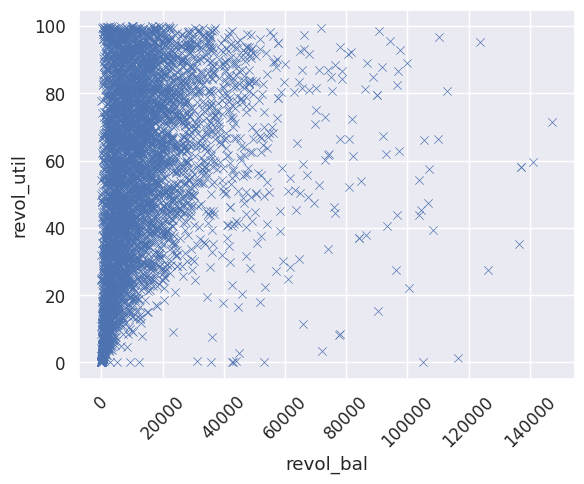

In [184]:
# loan_df_drop.columns
sns.scatterplot(data=loan_df_drop[loan_df_drop["loan_status"] == 'Charged Off'], x='revol_bal', y='revol_util', marker='x')
plt.xticks(rotation=45)
plt.show()

# Observation
# 1. When we compare revol_util with revol_bal, more defaulters are accumulated where the revol_util is higher and rovol_bal is smaller.

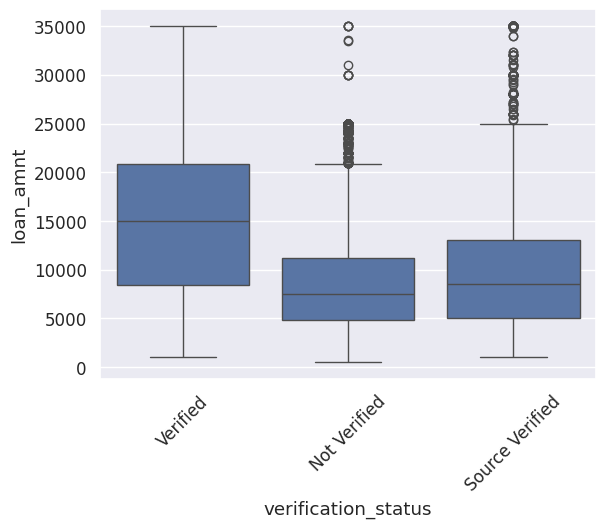

In [185]:
sns.boxplot(data=loan_df[loan_df.loan_status == 'Fully Paid'], x='verification_status', y='loan_amnt')
plt.xticks(rotation=45)
plt.show()

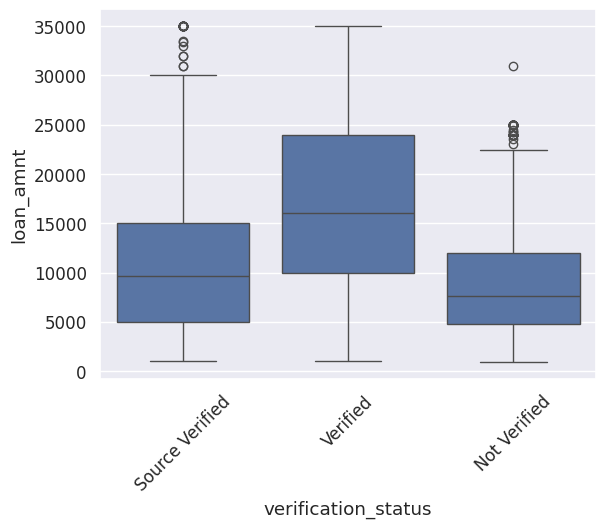

In [186]:
sns.boxplot(data=loan_df[loan_df.loan_status == 'Charged Off'], x='verification_status', y='loan_amnt')
plt.xticks(rotation=45)
plt.show()
# Observation
# 1. On verification, higher amount of loans are approved and they are leading to be defaulters.
# 2. Suggestion: improve the verification process. Seems like on verification, approving for higher amount of loans.

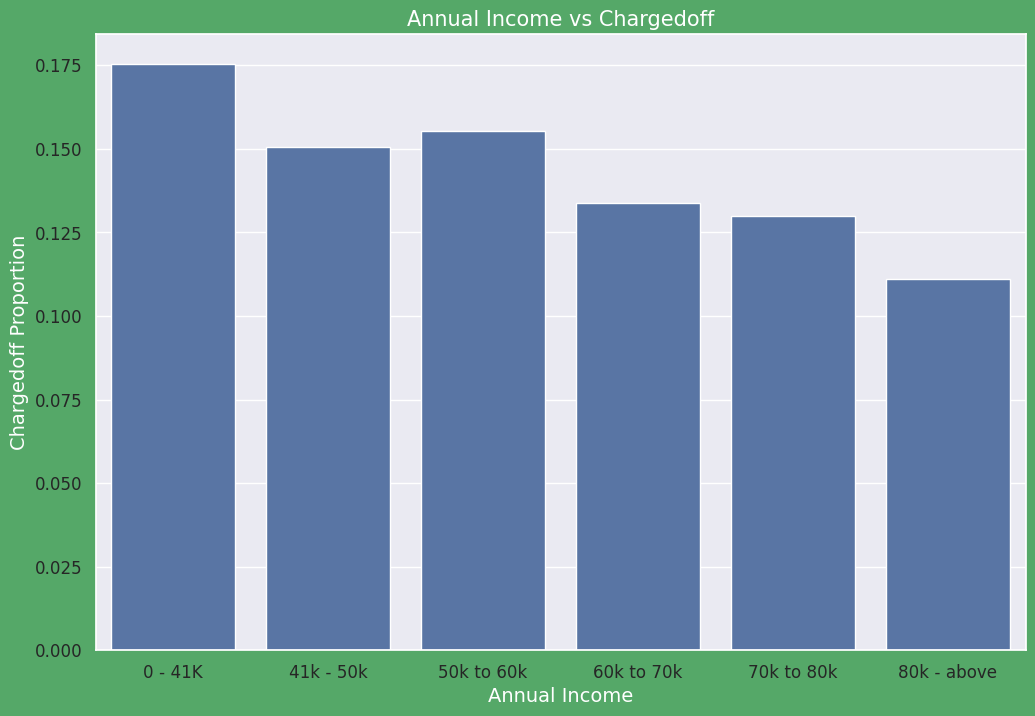

In [187]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_loan = loan_df_drop.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_loan['Total'] = inc_loan['Charged Off']+ inc_loan['Fully Paid']
inc_loan['Chargedoff_Prop'] = inc_loan['Charged Off'] / inc_loan['Total']
inc_loan.sort_values('Chargedoff_Prop', ascending=False)
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Annual Income vs Chargedoff',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_b', y='Chargedoff_Prop', data=inc_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Income range 80000+  has less chances of charged off.
# 2. Income range 0-20000 has high chances of charged off.
# 3. Increase in annual income decreases charged off proportion.

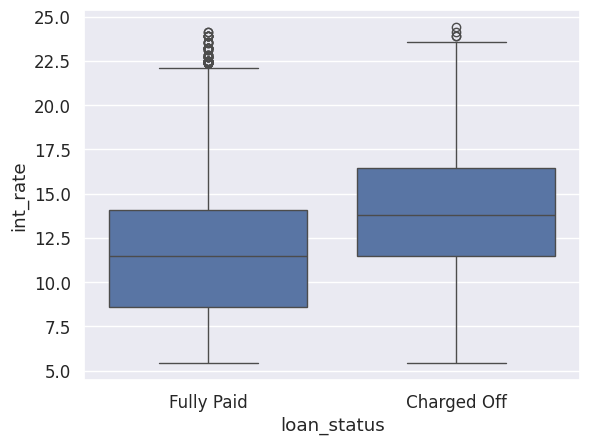

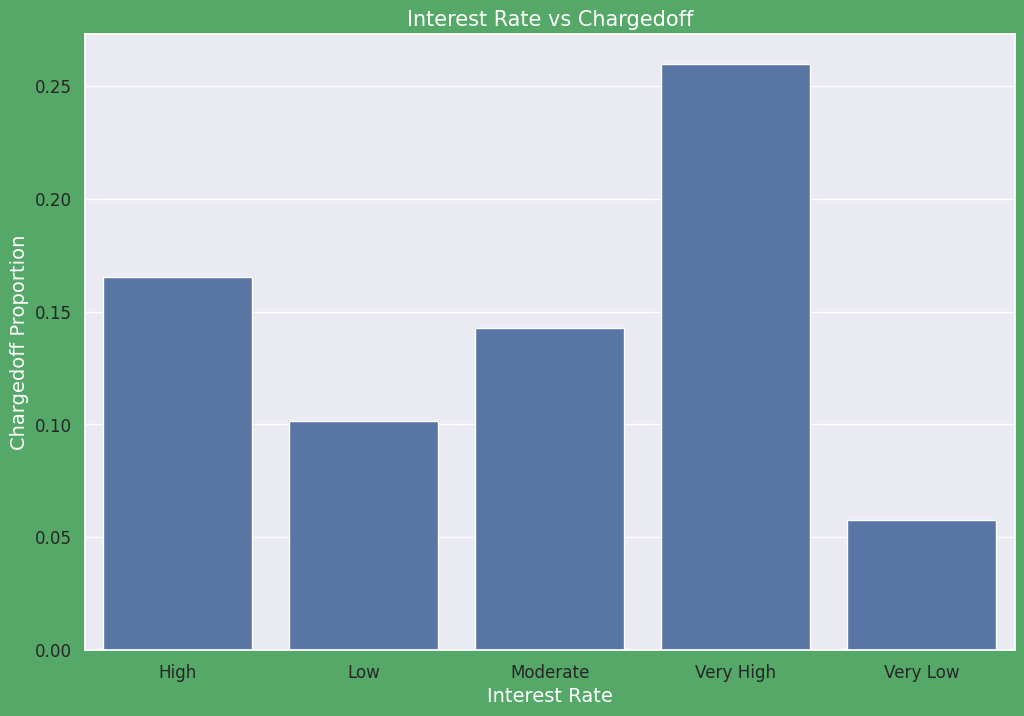

In [188]:
sns.boxplot(data=loan_df_drop, x='loan_status', y='int_rate')

#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_loan = loan_df_drop.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_loan['Total'] = interest_loan['Charged Off']+ interest_loan['Fully Paid']
interest_loan['Chargedoff_Prop'] = interest_loan['Charged Off'] / interest_loan['Total']
interest_loan.sort_values('Chargedoff_Prop', ascending=False)

## plot the diagram.
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Interest Rate vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_b', y='Chargedoff_Prop', data=interest_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# 1. Interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# 2. Interest rate more than 15% or very high has good chnaces of charged off as compared to other category intrest rates.
# 3. Reason could be they might be failing to pay the installments with higher interest rate.
# 4. Charged off proportion is increasing with higher intrest rates.


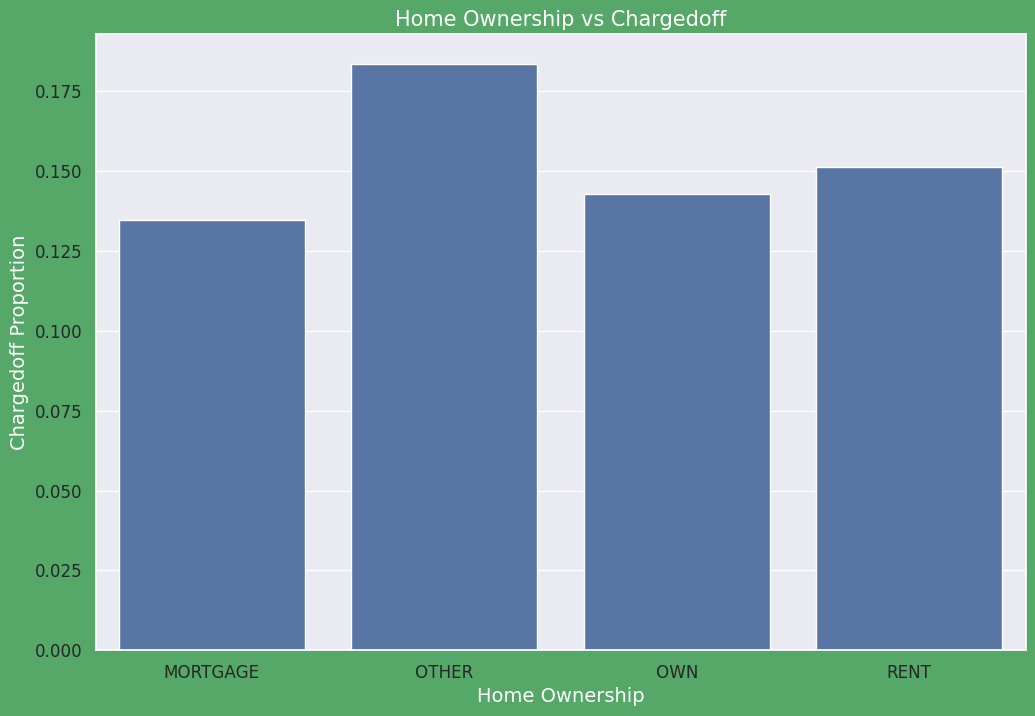

In [189]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_own_loan = loan_df_drop.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_own_loan['Total'] = home_own_loan['Charged Off']+ home_own_loan['Fully Paid']
home_own_loan['Chargedoff_Prop'] = home_own_loan['Charged Off'] / home_own_loan['Total']
home_own_loan.sort_values('Chargedoff_Prop', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Home Ownership vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Prop', data=home_own_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()
# observation:
# Those who are not owning the home is having high chances of loan defaults.

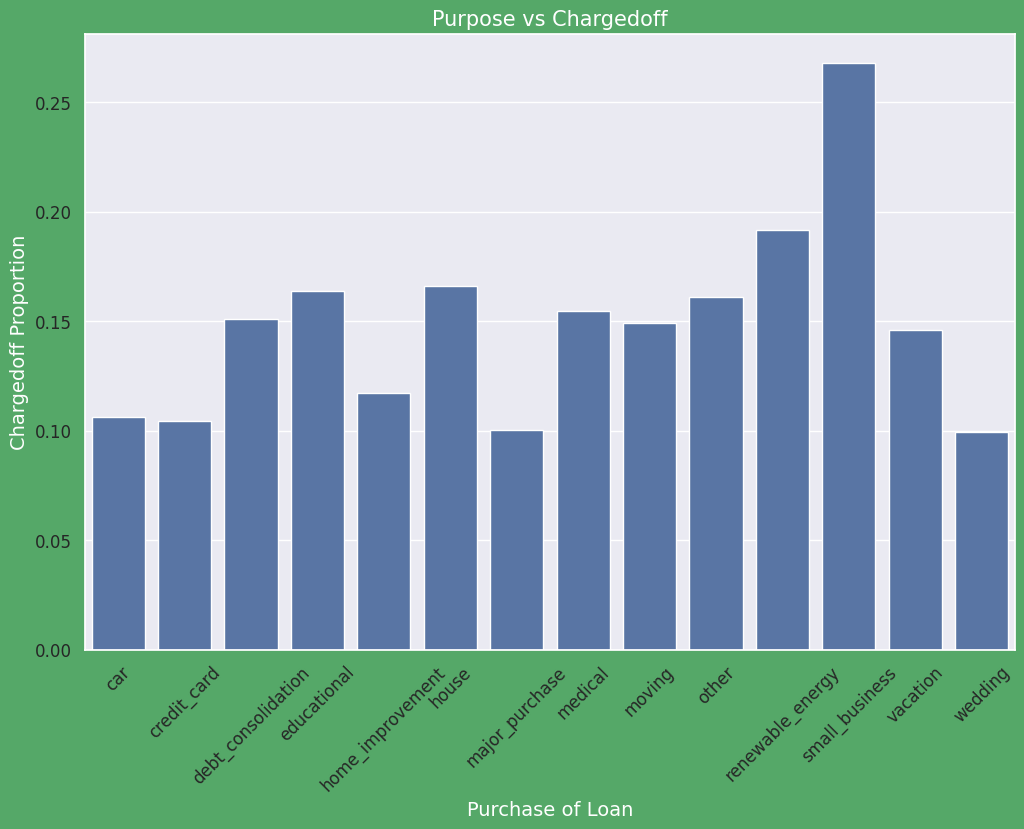

In [190]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_loan = loan_df_drop.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan['Total'] = purpose_loan['Charged Off']+ purpose_loan['Fully Paid']
purpose_loan['Chargedoff_Prop'] = purpose_loan['Charged Off'] / purpose_loan['Total']
purpose_loan.sort_values('Chargedoff_Prop', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Purpose vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Prop', data=purpose_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

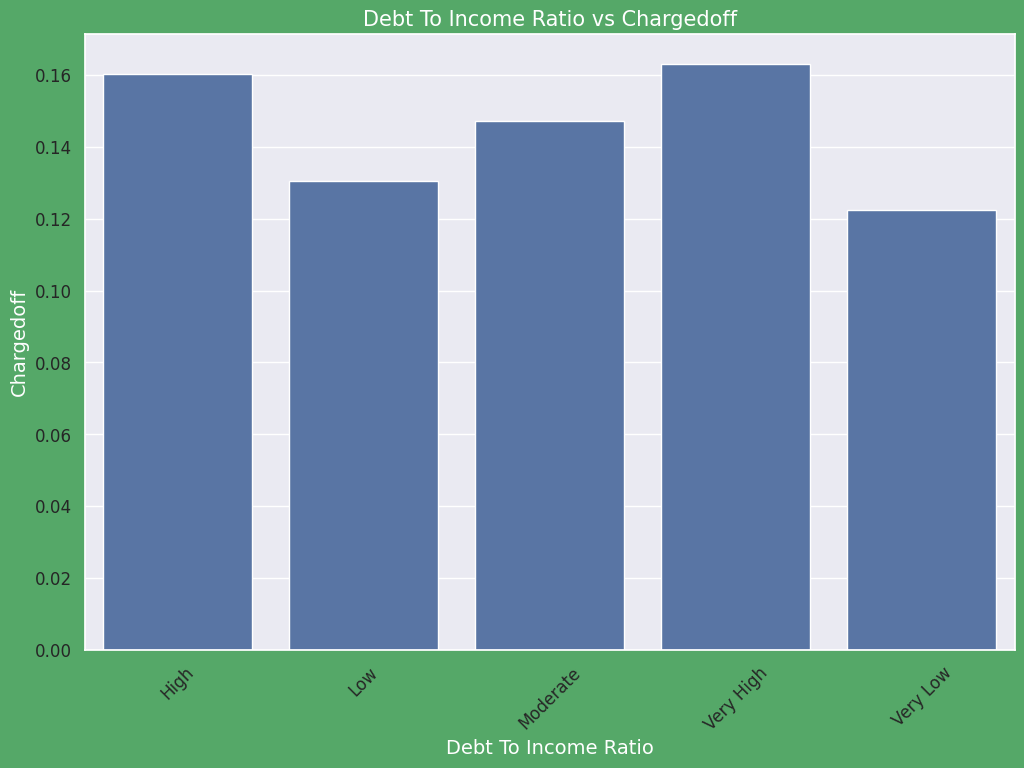

In [191]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_loan = loan_df_drop.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_loan['Total'] = dti_loan['Charged Off']+ dti_loan['Fully Paid']
dti_loan['Chargedoff_Prop'] = dti_loan['Charged Off'] / dti_loan['Total']
dti_loan.sort_values('Chargedoff_Prop', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Debt To Income Ratio vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='dti_b', y='Chargedoff_Prop', data=dti_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DTO having low chances loan defaults.

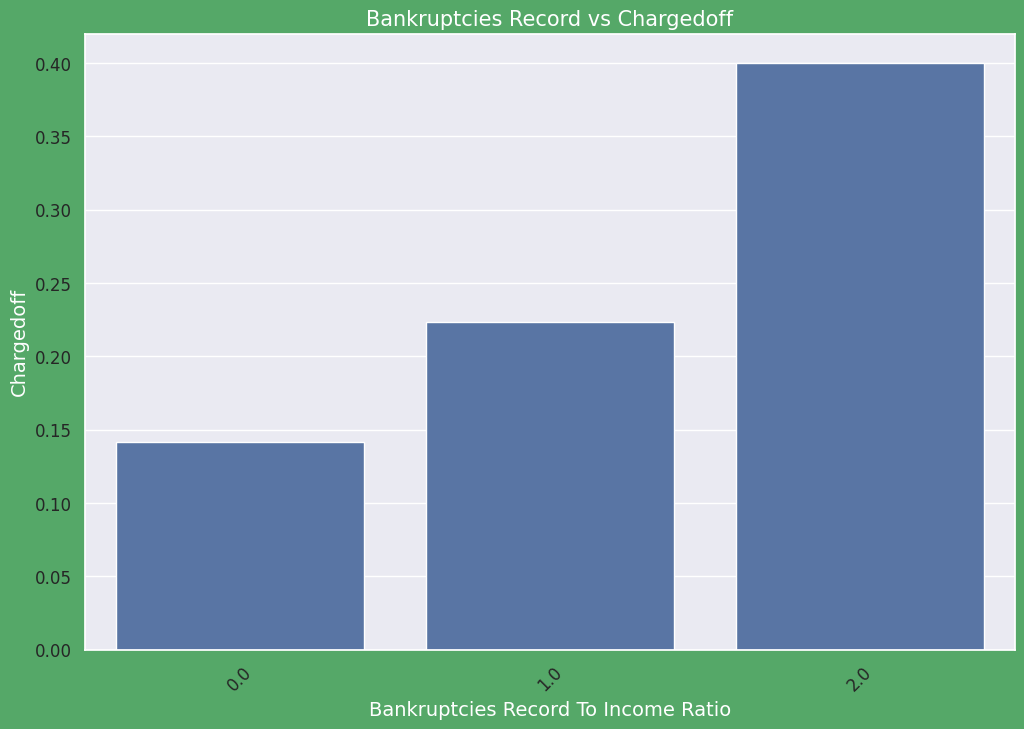

In [192]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
bankruptcies_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_loan['Total'] = bankruptcies_loan['Charged Off']+ bankruptcies_loan['Fully Paid']
bankruptcies_loan['Chargedoff_Prop'] = bankruptcies_loan['Charged Off'] / bankruptcies_loan['Total']
bankruptcies_loan.sort_values('Chargedoff_Prop', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Bankruptcies Record vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Prop', data=bankruptcies_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

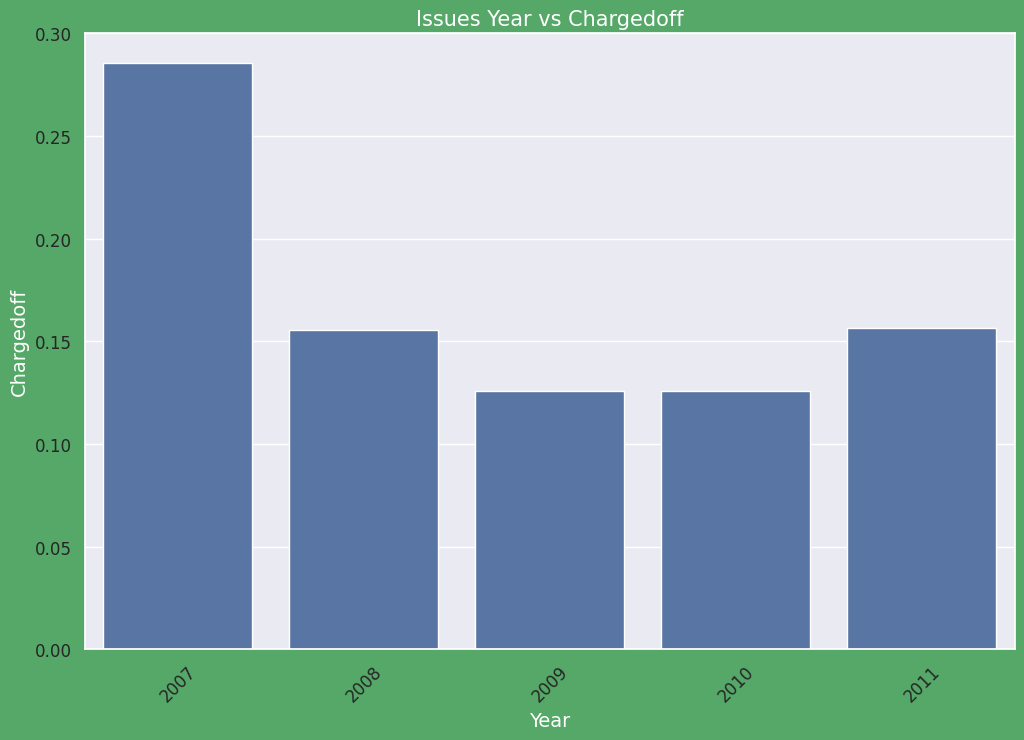

In [193]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

year_loan = loan_df_drop.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
year_loan['Total'] = year_loan['Charged Off']+ year_loan['Fully Paid']
year_loan['Chargedoff_Prop'] = year_loan['Charged Off'] / year_loan['Total']
year_loan.sort_values('Chargedoff_Prop', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Issues Year vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Prop', data=year_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations:
# Year 2007 is highest loan defaults.
# 2009 is having lowest loan defaults.

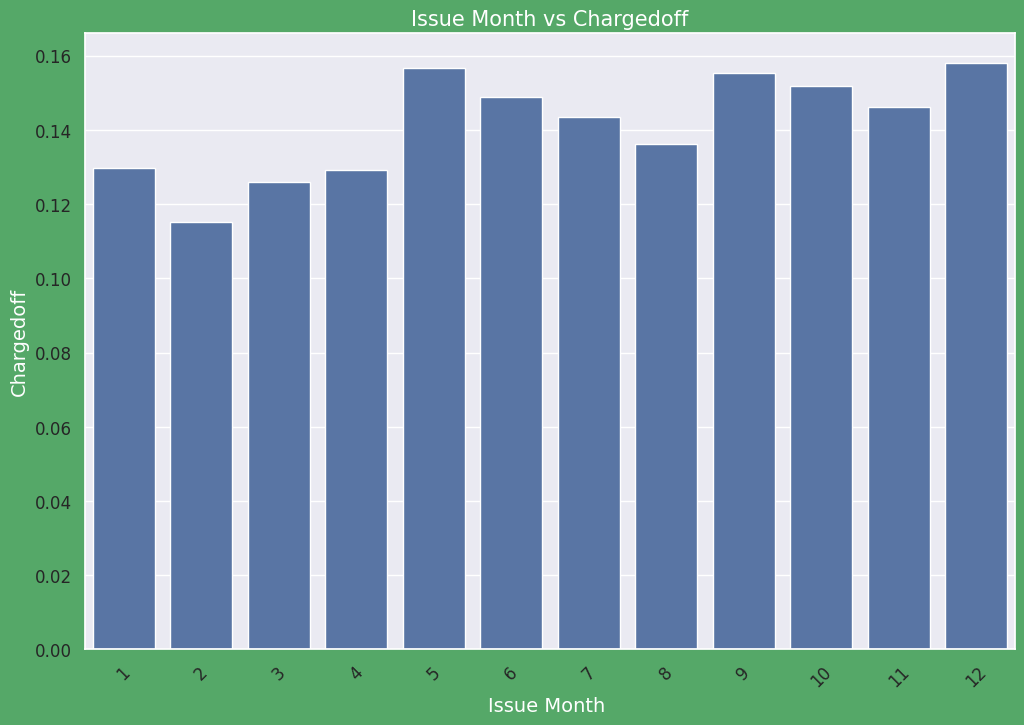

In [194]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

month_loan = loan_df_drop.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
month_loan['Total'] = month_loan['Charged Off']+ month_loan['Fully Paid']
month_loan['Chargedoff_Prop'] = month_loan['Charged Off'] / month_loan['Total']
month_loan.sort_values('Chargedoff_Prop', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Issue Month vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Prop', data=month_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# 1. Those loan has been issued in May, September and December is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
# 3. Majority of loan defaults comig from applicants whose loan has been aprroved from September to December


<Axes: xlabel='term', ylabel='int_rate'>

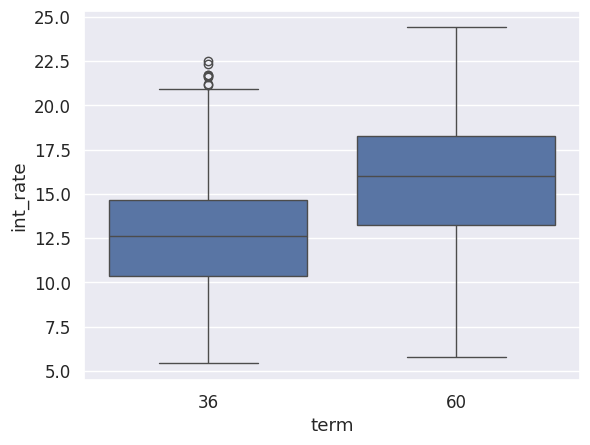

In [195]:
# checking the relation between term and int-rate for Charged off dataset
sns.boxplot(data=loan_df_drop[loan_df_drop["loan_status"]=="Charged Off"], x='term', y='int_rate')

# Observation
# 1. Higher interest rate for longest term is leading to the defaulters
# 2. Lowest interest rate for shortest term is also leading towards defaulters.
# 3. Reason:- In both the cases, the installment value would be higher, which is the common point to look at where customers are being defaulters.

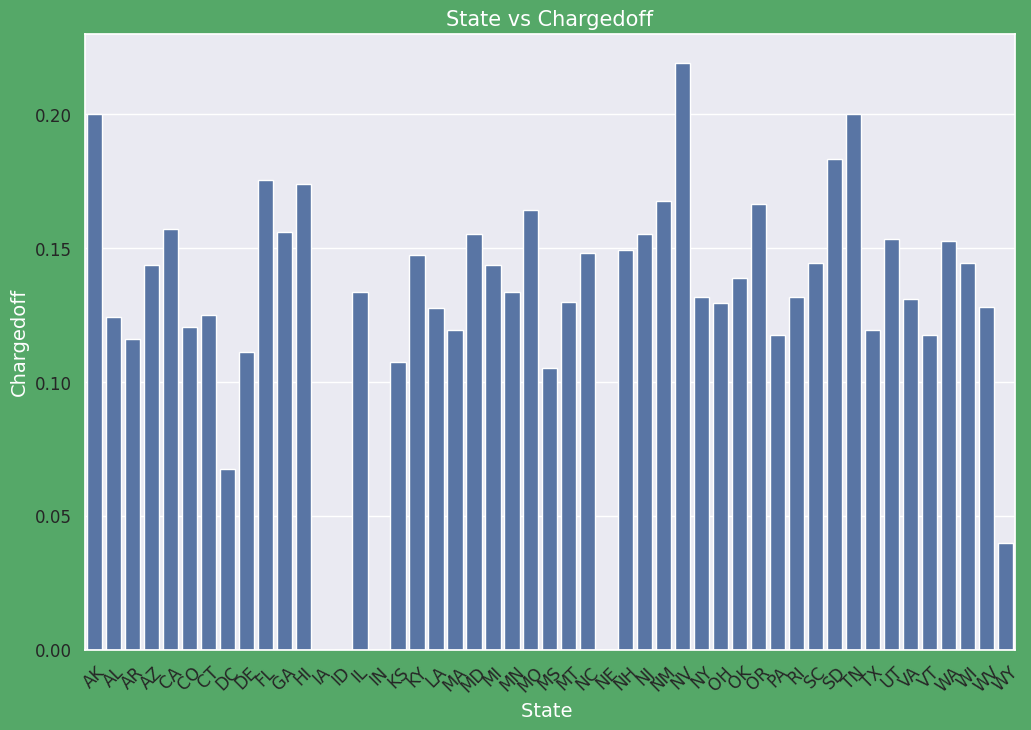

In [196]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_loan = loan_df_drop.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_loan['Total'] = addr_loan['Charged Off']+ addr_loan['Fully Paid']
addr_loan['Chargedoff_Prop'] = addr_loan['Charged Off'] / addr_loan['Total']
addr_loan.sort_values('Chargedoff_Prop', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('State vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Prop', data=addr_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations: TODO check status
# 1.NV States is holding highest number of loan defaults.
# 2.WY is having low number of loan defaults

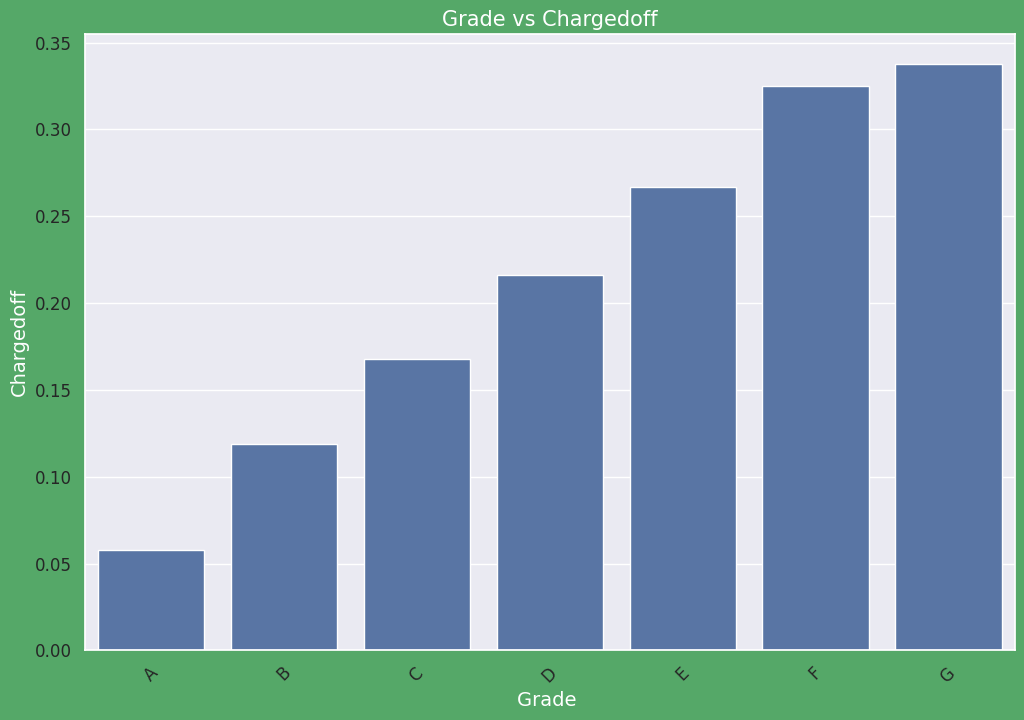

In [197]:
grade_loan = loan_df_drop.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_loan['Total'] = grade_loan['Charged Off']+ grade_loan['Fully Paid']
grade_loan['Chargedoff_Prop'] = grade_loan['Charged Off'] / grade_loan['Total']
grade_loan.sort_values('Chargedoff_Prop', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Grade vs Chargedoff',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Prop', data=grade_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations :
#1. The Loan applicants with loan Grade G is having higest Loan Defaults.
#2. The Loan applicants with loan A is having lowest Loan Defaults

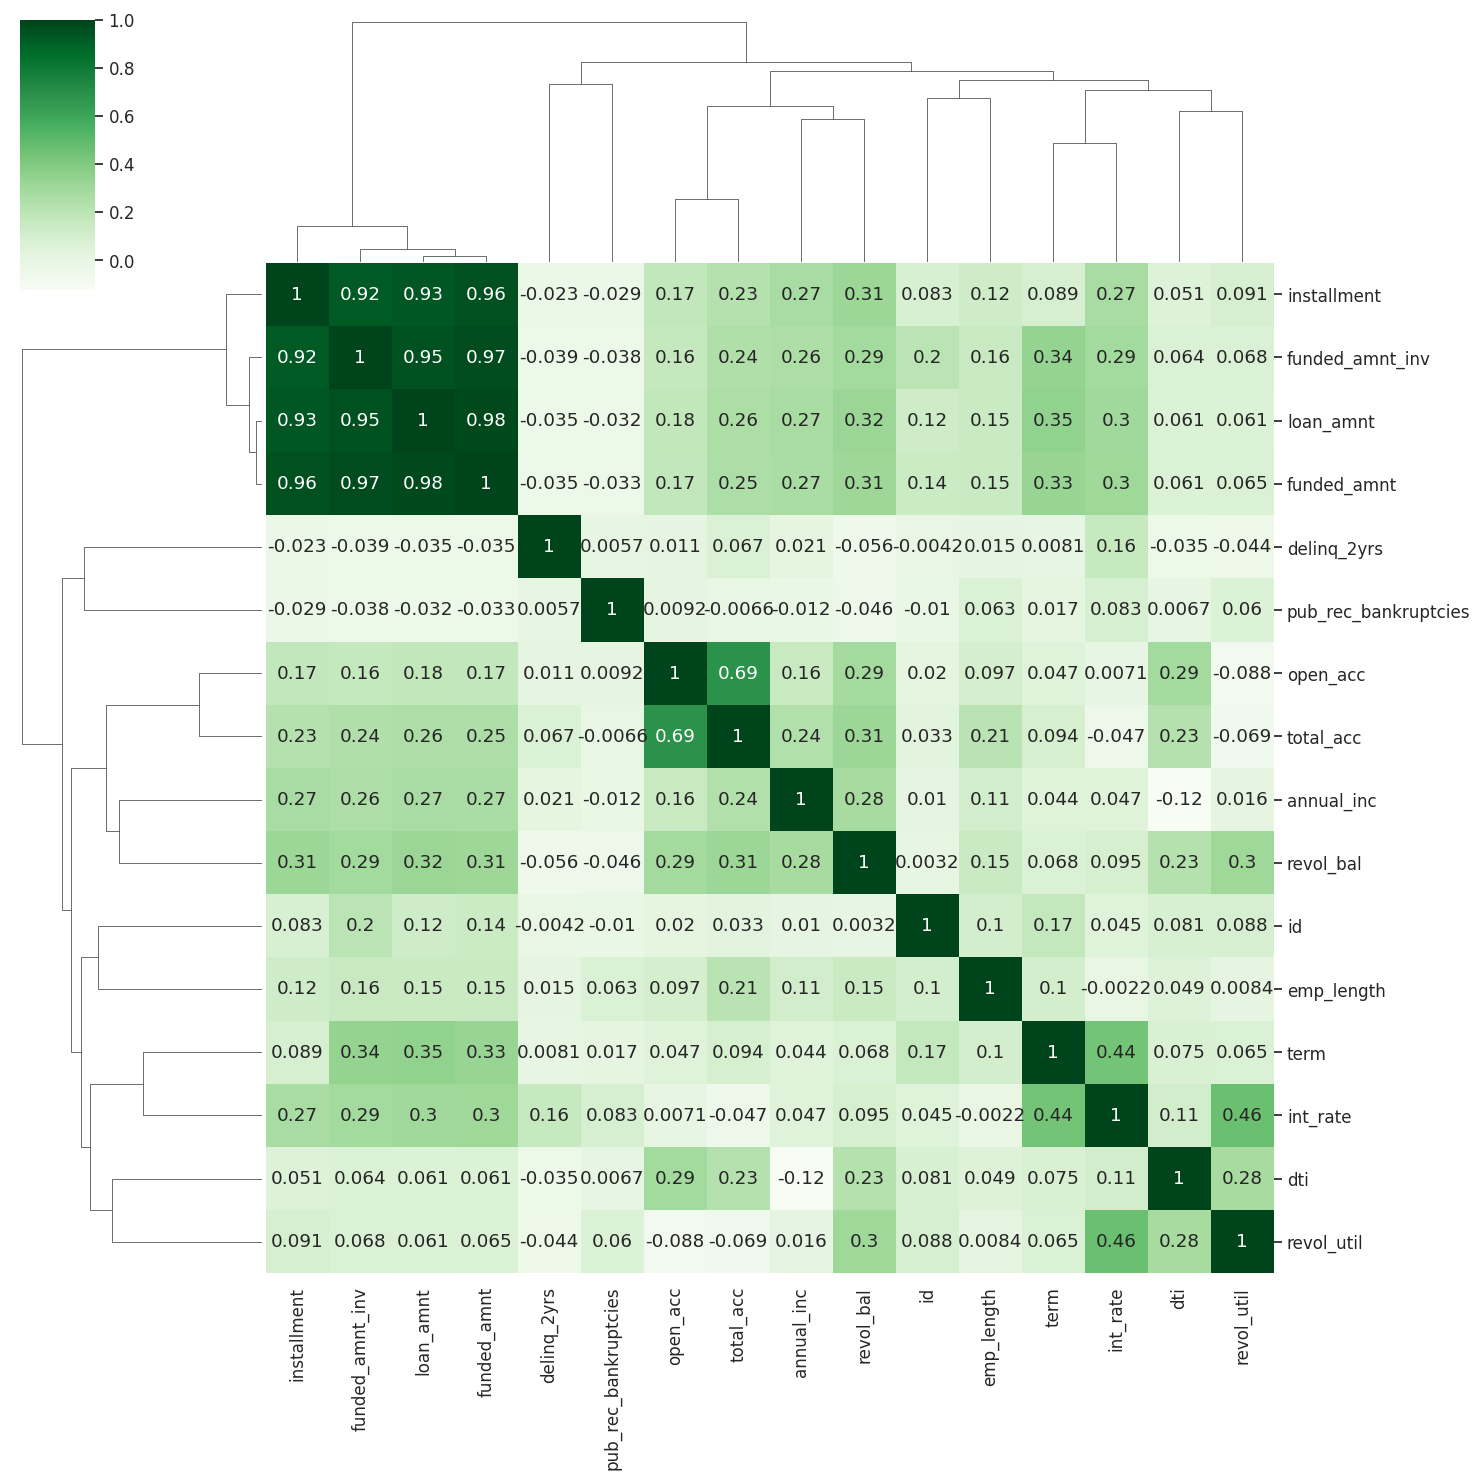

In [198]:

# Calculate correlation matrix for numeric columns only
sns.set(font_scale=1.1)
sns.clustermap(loan_df_drop[num_cols].corr(), annot=True, figsize=(15, 15), cmap="Greens")
plt.show()

# Observations:
# Negative Correlation:
# 1.loan_amnt has negative correlation with pub_rec_bankrupticies
# 2.annual income has a negative correlation with dti
# 3.loan_amnt has negative correlation with delinq_2yrs

# Strong Correlation:
# 1.term has a positive correlation with loan amount
# 2.term has a positive correlation with interest rate
# 3.annual income has a positive correlation with loan_amount
# 4. loan_amnt has strong positive correlation with Installment, funded_amnt, funded_amnt_inv